### Business Understanding
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants are capable of repaying the loan are not rejected.

There are three Dataset File
1. 'application_data.csv'  contains all the information of the client at the time of application. 
The data is about whether a client has payment difficulties.
2. 'previous_application.csv' contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.
3. 'columns_description.csv' is data dictionary which describes the meaning of the variables.  

**DISCLAIMER** Entire analysis was done Google Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#!pip install squarify

#Import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import skew
import missingno as msno
!pip install squarify 
import squarify
import matplotlib.cm
from sklearn import preprocessing

warnings.filterwarnings('ignore')
sns.set_style(style = 'whitegrid' )


%matplotlib inline

In [3]:
#Files available on these location
!ls "/content/drive/My Drive/Credit EDA Case Study"   

application_data.csv	 columns_description.gsheet
columns_description.csv  previous_application.csv


In [4]:
#Getting the Metadata of the File
metadata = pd.read_csv("/content/drive/My Drive/Credit EDA Case Study/columns_description.csv", encoding='iso-8859-1', index_col = 0  )
metadata.head()
# This will be used so as to understand the data

Table  ... Special
1  application_data  ...     NaN
2  application_data  ...     NaN
5  application_data  ...     NaN
6  application_data  ...     NaN
7  application_data  ...     NaN

[5 rows x 4 columns]

In [5]:
#Getting the application_data.csv file
application_data = pd.read_csv("/content/drive/My Drive/Credit EDA Case Study/application_data.csv", encoding='iso-8859-1')
application_data.head()

SK_ID_CURR  TARGET  ... AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR
0      100002       1  ...                       0.0                        1.0
1      100003       0  ...                       0.0                        0.0
2      100004       0  ...                       0.0                        0.0
3      100006       0  ...                       NaN                        NaN
4      100007       0  ...                       0.0                        0.0

[5 rows x 122 columns]

In [6]:
#Getting the previous_application.csv file
prev_application_data = pd.read_csv("/content/drive/My Drive/Credit EDA Case Study/previous_application.csv", encoding='iso-8859-1')
prev_application_data.head()

SK_ID_PREV  SK_ID_CURR  ... DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877  ...            -37.0                        0.0
1     2802425      108129  ...         365243.0                        1.0
2     2523466      122040  ...         365243.0                        1.0
3     2819243      176158  ...           -177.0                        1.0
4     1784265      202054  ...              NaN                        NaN

[5 rows x 37 columns]

#### Analysis of Current Dataset
Let's Try to analyze the distribution of the dataset, or let's do some EDA 

In [7]:
#Analyze both the data set and the data distribution
print("Dimension of the Application dataset is {0}".format(application_data.shape))
print("Dimension of the Previous dataset is {0}".format(prev_application_data.shape))
print("Out of {0} columns, {1} columns have null values for Application Dataset".format(application_data.shape[1],(application_data.isna().any()).sum()))
print("Out of {0} rows, {1} rows have null values for Application Dataset".format(application_data.shape[0],(application_data.isna().sum(axis = 1) > 0).sum()))
print("Out of {0} columns, {1} columns have null values for Previous Application Dataset".format(prev_application_data.shape[1],(prev_application_data.isna().any()).sum()))
print("Out of {0} rows, {1} rows have null values for Previous Application Dataset".format(prev_application_data.shape[0],(prev_application_data.isna().sum(axis = 1) > 0).sum()))

Dimension of the Application dataset is (307511, 122)
Dimension of the Previous dataset is (1670214, 37)
Out of 122 columns, 67 columns have null values for Application Dataset
Out of 307511 rows, 298909 rows have null values for Application Dataset
Out of 37 columns, 16 columns have null values for Previous Application Dataset
Out of 1670214 rows, 1670143 rows have null values for Previous Application Dataset


In [8]:
#Let's try to find out columns where Null Values are there,  across columns >= 20% or not in the application
col_names = application_data.loc[:,round(100*(application_data.isnull().sum()/len(application_data.index)), 2) > 20].columns
print(col_names)
# So Here we can see the column name which has more than 20% missing value
print(" Number of such columns are {0}, out of {1} i.e. {2:.2f}%".format(len(col_names), application_data.shape[1], (100 *(len(col_names)/application_data.shape[1]) ) ) )

Index(['OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
       'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLI

In [9]:
#Let's check the percentage of missing values for the application dataset.
total_missing = application_data.isnull().sum()
percent = round((100*(total_missing/application_data.isnull().count())),2)

#Making a table for both and get the top 20 Columns

missing_value_app_data = pd.concat([total_missing, percent], axis =1, keys= ['Total_missing', 'percent'])
missing_value_app_data.sort_values(by='Total_missing',ascending=False,inplace=True)
missing_value_app_data.head(20)

Total_missing  percent
COMMONAREA_MEDI                  214865    69.87
COMMONAREA_AVG                   214865    69.87
COMMONAREA_MODE                  214865    69.87
NONLIVINGAPARTMENTS_MODE         213514    69.43
NONLIVINGAPARTMENTS_AVG          213514    69.43
NONLIVINGAPARTMENTS_MEDI         213514    69.43
FONDKAPREMONT_MODE               210295    68.39
LIVINGAPARTMENTS_MODE            210199    68.35
LIVINGAPARTMENTS_AVG             210199    68.35
LIVINGAPARTMENTS_MEDI            210199    68.35
FLOORSMIN_AVG                    208642    67.85
FLOORSMIN_MODE                   208642    67.85
FLOORSMIN_MEDI                   208642    67.85
YEARS_BUILD_MEDI                 204488    66.50
YEARS_BUILD_MODE                 204488    66.50
YEARS_BUILD_AVG                  204488    66.50
OWN_CAR_AGE                      202929    65.99
LANDAREA_MEDI                    182590    59.38
LANDAREA_MODE                    182590    59.38
LANDAREA_AVG                     182590    59.38

Most of the missing values had contribution more than 45%, that's why we took greater that 45%
When we analysed the outcome, every variables turned out to be in a group of 3
e.g., (APARTMENTS_AVG',
 'APARTMENTS_MEDI',
 'APARTMENTS_MODE',)
 
 ('BASEMENTAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_MODE',)

 If one was an missing, the other two variables also turned out to be missing values. 

 The exceptions that were found are: EMERGENCYSTATE_MODE,  EXT_SOURCE_1,  FONDKAPREMONT_MODE,  HOUSETYPE_MODE,  OWN_CAR_AGE,  TOTALAREA_MODE,  WALLSMATERIAL_MODE

 As we don't have any information about EXT_SOURCE_1, we can just overlook the same. 
EMERGENCYSTATE_MODE,  FONDKAPREMONT_MODE,  HOUSETYPE_MODE, WALLSMATERIAL_MODE these categorical varaiables have been analysed below to have better insights


In [0]:
#Now let's analyse these categorical columns. We'll first compare each category of a column then for each category, we'll look for how many percentage 
#of that category is likely to default i.e., percentage of each category having target value 1.

#Creating a funtion for the subplots

def plot_column(column_name, rotaion_required = False, horizonal_subplots = True):
    #Number of loans sanctioned for each category:
    sanctioned = application_data[column_name].value_counts()
    #Making dataframe containing number of loans sanctioned for each category
    df_sanctioned = pd.DataFrame({column_name : sanctioned.index, 'Number of loans sanctioned' : sanctioned.values})
    
    #Calculating the %age of each category that has Target value 1 i.e., %age of each category that can default 
    #on the repayment of loan (Making separate dataframe for it)
    df_perc_default = application_data[[column_name,'TARGET']].groupby(by=column_name,as_index=False).mean()
    df_perc_default['TARGET'] = round(df_perc_default['TARGET']*100, 2)
    df_perc_default.sort_values(by='TARGET', inplace=True, ascending=False)
    
    #Making subplots
    if(horizonal_subplots):
        fig, (plot1, plot2) = plt.subplots(ncols=2, figsize = (20,6))
    else:
        fig, (plot1, plot2) = plt.subplots(nrows=2, figsize = (20,14))
        plt.subplots_adjust(hspace=0.5) #To give some spacing between the plots
    

    #Setting color colde
    sns.set_color_codes('pastel')
    
    #plotting the bar plot for df_sanctioned
    s = sns.barplot(ax=plot1, x=column_name, y='Number of loans sanctioned', data=df_sanctioned)
    # Because of some dominating category the barplots are getting scalled up so as a result lesser contributing category are not visible
    # s.set(yscale="log")
    
    #Rotating label if rotation_required is True:
    if(rotaion_required):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    #plotting the bar plot for df_perc_default
    s = sns.barplot(ax=plot2, x=column_name, y='TARGET', data = df_perc_default)
    
    #Rotating label if rotation_required is True:
    if(rotaion_required):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    #labelling y axis
    plt.ylabel('Percentage of each category having Target value 1', fontsize = 10)
    plt.show()

    
    df_sanctioned = df_sanctioned.merge(df_perc_default)
    # if(df_sanctioned.shape[0] < 10):
    #   plt.figure(figsize=(20,10))
    #   cmap = matplotlib.cm.Blues_r
    #   mini=min(df_sanctioned['TARGET'])
    #   maxi=max(df_sanctioned['TARGET'])
    #   norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
    #   colors = [cmap(norm(value)) for value in df_sanctioned['TARGET'].tolist()]
    #   print(colors)
    #   squarify.plot(sizes=df_sanctioned['Number of loans sanctioned'], label = df_sanctioned[column_name], alpha=.6, color=colors  )
    # else:
    print(df_sanctioned)




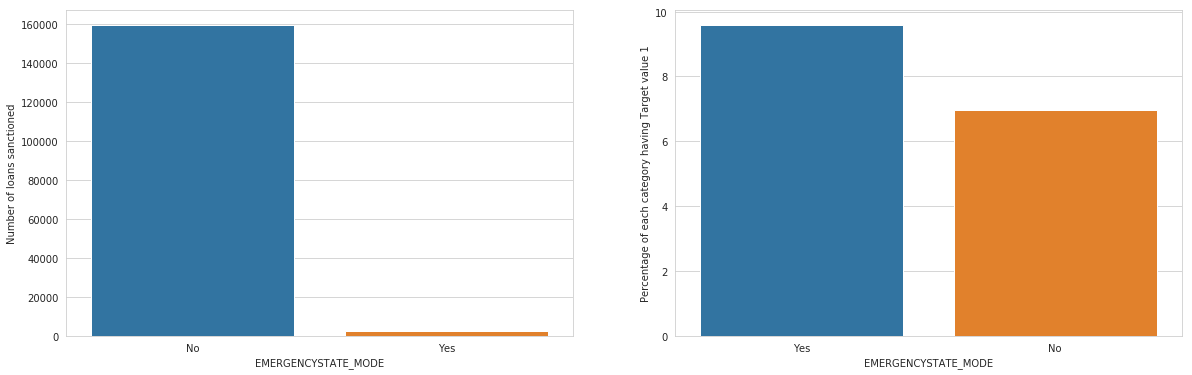

  EMERGENCYSTATE_MODE  Number of loans sanctioned  TARGET
0                  No                      159428    6.96
1                 Yes                        2328    9.58


In [11]:
plot_column('EMERGENCYSTATE_MODE')
#Data is completely imbalanced. No conclusion can be made out of it.

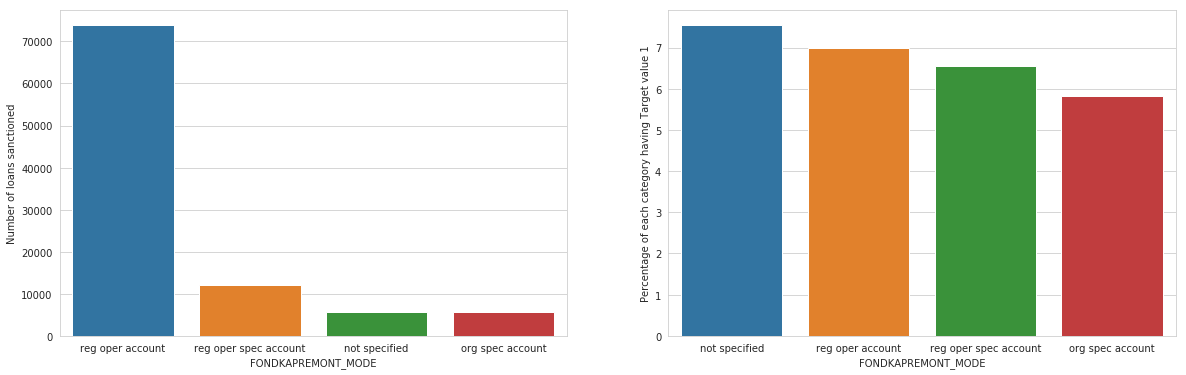

      FONDKAPREMONT_MODE  Number of loans sanctioned  TARGET
0       reg oper account                       73830    6.98
1  reg oper spec account                       12080    6.56
2          not specified                        5687    7.54
3       org spec account                        5619    5.82


In [12]:
plot_column('FONDKAPREMONT_MODE')
#Data looks pretty imbalanced and only category i.e. reg oper account is dominating so no conclusion can be derived from here

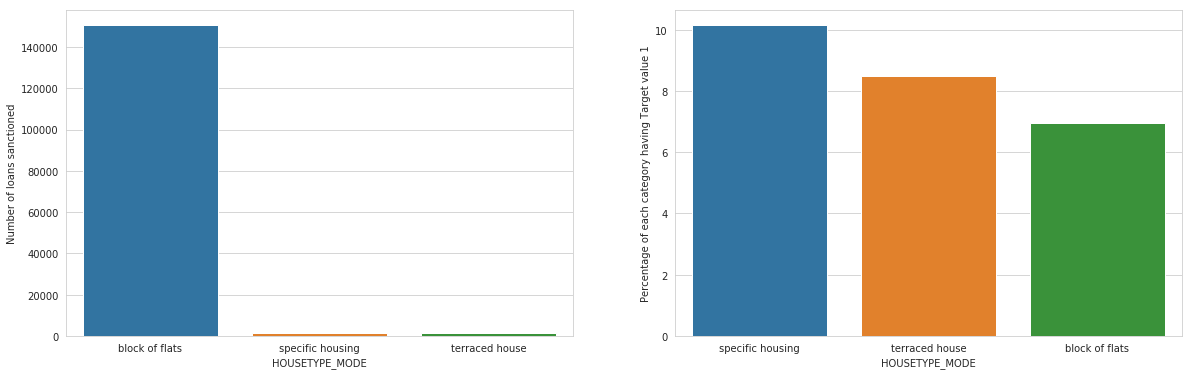

     HOUSETYPE_MODE  Number of loans sanctioned  TARGET
0    block of flats                      150503    6.94
1  specific housing                        1499   10.14
2    terraced house                        1212    8.50


In [13]:
plot_column('HOUSETYPE_MODE')
#Data looks pretty imbalanced and only category i.e. block of flats is dominating so no conclusion can be derived from here

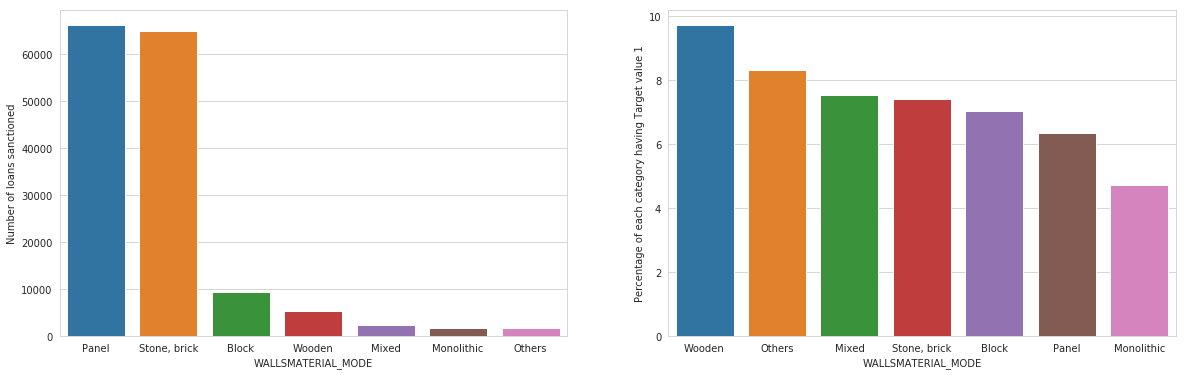

  WALLSMATERIAL_MODE  Number of loans sanctioned  TARGET
0              Panel                       66040    6.35
1       Stone, brick                       64815    7.41
2              Block                        9253    7.02
3             Wooden                        5362    9.70
4              Mixed                        2296    7.53
5         Monolithic                        1779    4.72
6             Others                        1625    8.31


In [14]:
plot_column('WALLSMATERIAL_MODE')
#Data looks pretty imbalanced and only category i.e. panel & stone, brick is dominating so no conclusion can be derived from here

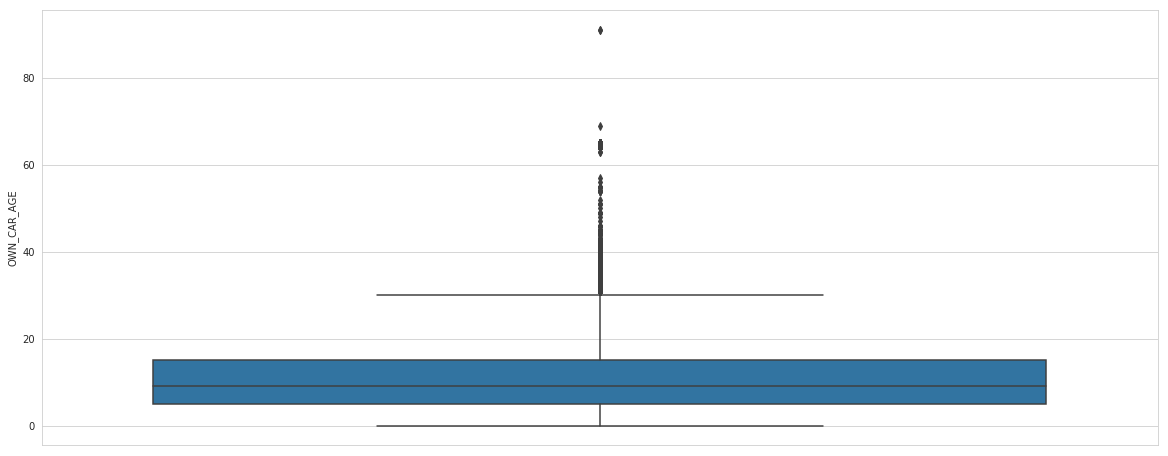

In [15]:
#Analysing OWN_CAR_AGE 
plt.figure(figsize=(20,8))
sns.boxplot(y=application_data['OWN_CAR_AGE'])
plt.show()
# As we can see ther are lot's of points which were outlier so we thought of checking out the data spread 

As we can see there are a lot of points laying in the upper whiskers, means the car's age is more than 30 years that's why the outliers is coming.

In [16]:
#It's incorrect to have OWN_CAR_AGE as NaN if someone owns a car
app_data_demp = application_data.loc[application_data['OWN_CAR_AGE'].isna(), ['OWN_CAR_AGE', 'FLAG_OWN_CAR']]
app_data_demp[app_data_demp['FLAG_OWN_CAR'] == 'Y']

OWN_CAR_AGE FLAG_OWN_CAR
30897           NaN            Y
181231          NaN            Y
217549          NaN            Y
229867          NaN            Y
236868          NaN            Y

#### Conclusion for missing values in Application Data Column wise
As not much of an insight can be drawn from the missing values and around ~50 columns have more than 20% missing values and they are not putting so much insights towards the conclusion so can drop all of those columns

In [17]:
# Drop all the columns
application_data.drop(missing_value_app_data[missing_value_app_data['percent']>20].index.tolist(), axis = 1, inplace = True)
#Final Data Set Shape after Dropping
application_data.shape

(307511, 72)

In [18]:
#Convert the numerical values to categorical value
print(application_data.dtypes.value_counts())
possible_catg_var = application_data.select_dtypes(np.number).apply(pd.Series.nunique, axis = 0).sort_values()
col_names = possible_catg_var[possible_catg_var.values <= 3].index.tolist()
application_data[col_names] = application_data[col_names].astype('object')
print('=========================================================================================')
print(application_data.dtypes.value_counts())

int64      41
float64    20
object     11
dtype: int64
object     46
float64    20
int64       6
dtype: int64


In [19]:
#Inpute missin values for integer values
application_data.select_dtypes(np.number).isnull().sum().sort_values(ascending = False)

EXT_SOURCE_3                  60965
AMT_REQ_CREDIT_BUREAU_YEAR    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
EXT_SOURCE_2                    660
AMT_GOODS_PRICE                 278
AMT_ANNUITY                      12
CNT_FAM_MEMBERS                   2
DAYS_LAST_PHONE_CHANGE            1
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
HOUR_APPR_PROCESS_START           0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
SK_ID_CURR                        0
dtype: int64

#### Let's Analyse for EXT_SOURCE_3                  

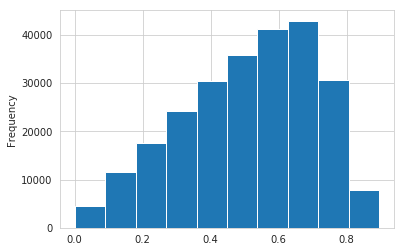

In [20]:
# Check th distribution of the data
application_data['EXT_SOURCE_3'].plot.hist()

In [21]:
#Statistic of the Column
application_data['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [22]:
#Used interpolation technique to fill the missing values rather than hard-coding the value (mean/median/mode) as lot's of missing values were there
application_data['EXT_SOURCE_3'] = application_data['EXT_SOURCE_3'].interpolate(method ='linear', limit_direction ='backward')
application_data['EXT_SOURCE_3'].describe()

count    307511.000000
mean          0.511090
std           0.185438
min           0.000527
25%           0.382502
50%           0.531686
75%           0.656158
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

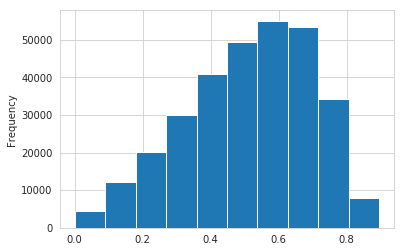

In [23]:
#NaN/Missing values looks uniformly distributed
application_data['EXT_SOURCE_3'].plot.hist()
plt.show()

#### Let's try to Impute values for AMT_GOODS_PRICE

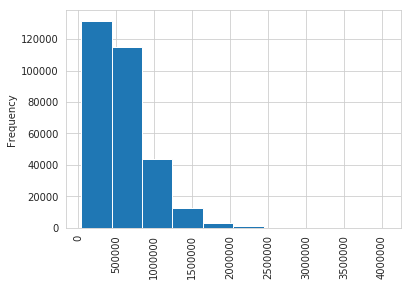

In [24]:
# Check th distribution of the data
application_data['AMT_GOODS_PRICE'].plot.hist()
plt.xticks(rotation = 90)
plt.show()

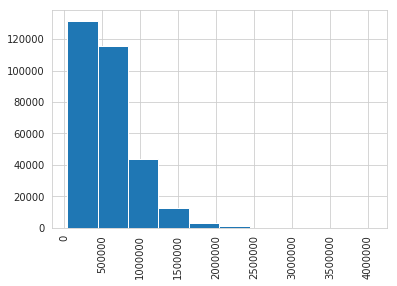

In [25]:
# Here we are computing the missing values with mean
# Not mode because data is skewed , so either median or mean 
application_data['AMT_GOODS_PRICE'].fillna(application_data['AMT_GOODS_PRICE'].mean(), inplace = True)
application_data['AMT_GOODS_PRICE'].hist()
plt.xticks(rotation = 90)
plt.show()

#### Let's analyze: AMT_ANNUITY

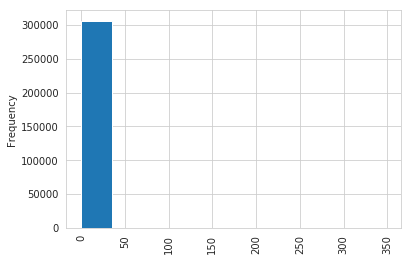

In [26]:
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].plot.hist()
plt.xticks(rotation = 90)
plt.show()

In [27]:
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

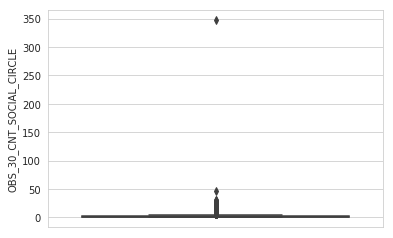

In [28]:
#Spread of data
sns.boxplot(y = application_data['OBS_30_CNT_SOCIAL_CIRCLE'])

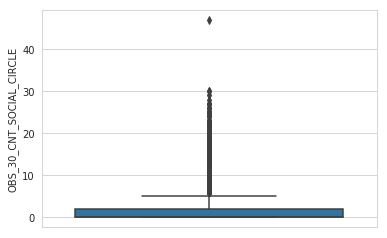

In [29]:
# As this point looks like an outlier so let's drop the row
index_to_drop = application_data[application_data['OBS_30_CNT_SOCIAL_CIRCLE'] > 300 ].index.tolist()[0]
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].drop([index_to_drop], inplace = True)
sns.boxplot(y = application_data['OBS_30_CNT_SOCIAL_CIRCLE'])

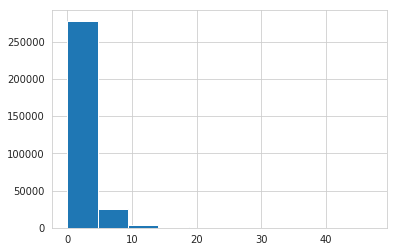

In [30]:
# So feq observation can be drwan there are few points beyond 30 which are more like an outlier
# And here the best possible metric to replace NaN values is Mean in rounded fashion as number is of type integer
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(round(application_data['OBS_30_CNT_SOCIAL_CIRCLE'].mean()), inplace = True)
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].hist()
plt.show()

In [31]:
# After replacing values, statistic of the same
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].describe()

count    307510.000000
mean          1.419716
std           2.314217
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          47.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

#### Let's analyze for AMT_REQ_CREDIT_BUREAU_YEAR

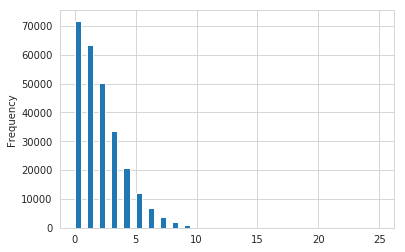

In [32]:
#Check the distribution of the data
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].plot.hist(bins = 50 )
plt.show()

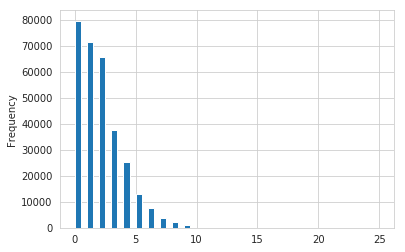

In [33]:
# We used the interpolation technique because the mode can'e be taken because of skewness and between mode and mean there was a huge difference
# So the best solution was to interpolate the data and then round becuase this feature is of type integer
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'] = round(application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].interpolate(method ='linear', limit_direction ='backward'))
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].plot.hist(bins = 50)
plt.show()

#### Missing Values for Application data Row wise

In [34]:
#Let's try to find out rows where Null Values are there  across rows >= 50% or not in the application
application_data.loc[(round(100*(application_data.isnull().sum(axis = 1)/len(application_data.columns)), 2) > 20), : ].index
# As we can see no rows are there with that kind

Int64Index([], dtype='int64')

In [35]:
#Now to check for the duplicated rows
application_data.duplicated().sum() == 0 
# As we can see below there is no duplicated rows

True

#### Missing Value computation for Previous Application Column wise

In [36]:
#Let's try to find out columns where Null Values are there  across columns >= 50% or not in the previous application
prev_application_data.loc[:,round(100*(prev_application_data.isnull().sum()/len(prev_application_data.index)), 2) >= 20.00].columns

Index(['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'CNT_PAYMENT',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [37]:
#Similarly checking missing values in previous application dataset
total_missing = prev_application_data.isnull().sum()
percent = (100*(total_missing/prev_application_data.isnull().count()))

#Making a table for both

missing_value_prev_app_data = pd.concat([total_missing, percent], axis =1, keys= ['total_missing', 'percent'])
missing_value_prev_app_data.sort_values(by='total_missing',ascending=False).head(15)


total_missing    percent
RATE_INTEREST_PRIVILEGED         1664263  99.643698
RATE_INTEREST_PRIMARY            1664263  99.643698
AMT_DOWN_PAYMENT                  895844  53.636480
RATE_DOWN_PAYMENT                 895844  53.636480
NAME_TYPE_SUITE                   820405  49.119754
NFLAG_INSURED_ON_APPROVAL         673065  40.298129
DAYS_TERMINATION                  673065  40.298129
DAYS_LAST_DUE                     673065  40.298129
DAYS_LAST_DUE_1ST_VERSION         673065  40.298129
DAYS_FIRST_DUE                    673065  40.298129
DAYS_FIRST_DRAWING                673065  40.298129
AMT_GOODS_PRICE                   385515  23.081773
AMT_ANNUITY                       372235  22.286665
CNT_PAYMENT                       372230  22.286366
PRODUCT_COMBINATION                  346   0.020716

In [38]:
# As there are columns where nearly 25% of data is missing
# Drop all the columns
prev_application_data.drop(missing_value_prev_app_data[missing_value_prev_app_data['percent']>25].index.tolist(), axis = 1, inplace = True)
#Final Data Set Shape after Dropping
prev_application_data.shape

(1670214, 26)

In [39]:
#Changing the numerical variables to Categorical variable
print(prev_application_data.dtypes.value_counts())
possible_catg_var_prev_app = prev_application_data.select_dtypes(np.number).apply(pd.Series.nunique, axis = 0).sort_values()
col_names = possible_catg_var_prev_app[possible_catg_var_prev_app.values < 3].index.tolist()
prev_application_data[col_names] = prev_application_data[col_names].astype('object')
print('=========================================================================================')
print(prev_application_data.dtypes.value_counts())

object     15
int64       6
float64     5
dtype: int64
object     16
float64     5
int64       5
dtype: int64


In [40]:
#Inpute missing values for integer values
prev_application_data.select_dtypes(np.number).isnull().sum().sort_values(ascending = False)

AMT_GOODS_PRICE            385515
AMT_ANNUITY                372235
CNT_PAYMENT                372230
AMT_CREDIT                      1
SELLERPLACE_AREA                0
DAYS_DECISION                   0
HOUR_APPR_PROCESS_START         0
AMT_APPLICATION                 0
SK_ID_CURR                      0
SK_ID_PREV                      0
dtype: int64

#### Lets analyze AMT_GOODS_PRICE            

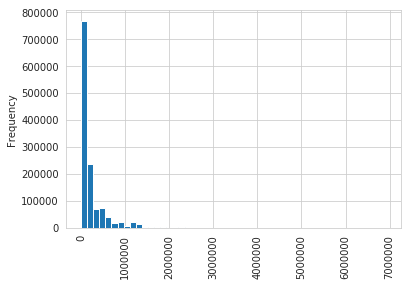

In [41]:
# Check th distribution of the data
prev_application_data['AMT_GOODS_PRICE'].plot.hist(bins = 50)
plt.xticks(rotation = 90)
plt.show()

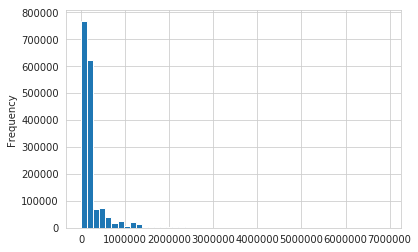

In [42]:
#Imputed the missing values with mean
prev_application_data['AMT_GOODS_PRICE'].fillna(round(prev_application_data['AMT_GOODS_PRICE'].mean(),1),inplace = True)
prev_application_data['AMT_GOODS_PRICE'].plot.hist(bins = 50)

#### Let's analyze AMT_ANNUITY

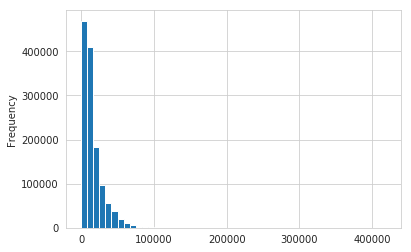

In [43]:
# Check th distribution of the data
prev_application_data['AMT_ANNUITY'].plot.hist(bins = 50)
plt.show()

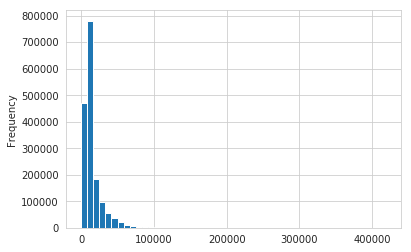

In [44]:
#Imputed the missing values with mean
prev_application_data['AMT_ANNUITY'].fillna(round(prev_application_data['AMT_ANNUITY'].mean(),3),inplace = True)
prev_application_data['AMT_ANNUITY'].plot.hist(bins = 50)

#### Missing Value computation for Previous Application Rows wise

In [45]:
#Let's try to find out rows where Null Values are there  across rows > 25% or not in the previous application
prev_application_data.loc[(round(100*(prev_application_data.isnull().sum(axis = 1)/len(prev_application_data.columns)), 2) >25 ), : ].index
# As we can see no rows are there with that kind

Int64Index([], dtype='int64')

In [46]:
#Now to check for the duplicated rows
prev_application_data.duplicated().sum() == 0 
# As we can see below there is no duplicated rows

True

In [47]:
#Common Columns across tables
col_common = list(set(application_data.columns).intersection(set(prev_application_data.columns))) 
col_common

['SK_ID_CURR',
 'WEEKDAY_APPR_PROCESS_START',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'HOUR_APPR_PROCESS_START',
 'NAME_CONTRACT_TYPE',
 'AMT_ANNUITY']

### Let's check the distribution of the Target Variable
As this attribute is the main categorical valriable.


1.   **The client with payment difficulties:** he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample, Denoted by **1**
2.   **All other cases:** All other cases when the payment is paid on time. Denoted by **0**

Let's find the Data Distribution, is the Data Imbalanced / Is the data Balanced ?



In [48]:
#Let's get the Value counts for each of the Lablels
100 * (application_data.TARGET.value_counts() / len(application_data.TARGET))

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

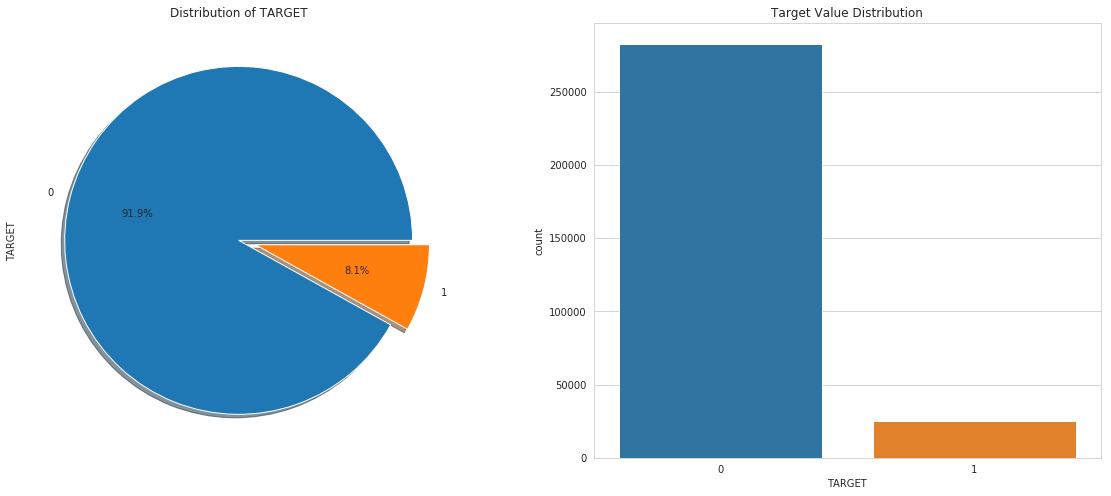

In [49]:
# Distribution of the Count 
f,ax=plt.subplots(1,2,figsize= (20,8))
application_data.TARGET.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True, ax = ax[0])
ax[0].set_title('Distribution of TARGET')
sns.countplot('TARGET',data=application_data,ax=ax[1])
ax[1].set_title('Target Value Distribution')
plt.show()

So from the above grpah we can clearly view that the data is **imbalanced**. We can say loans that were repaid on time are way more than loans that were not repaid on time. Why the data is imbalaced as the for **0** we have 91% of data and for **1** we have 8% so the data is highly imbalanced

#### Lets Try to find the Outlier

Number of Numeric Data Type 26


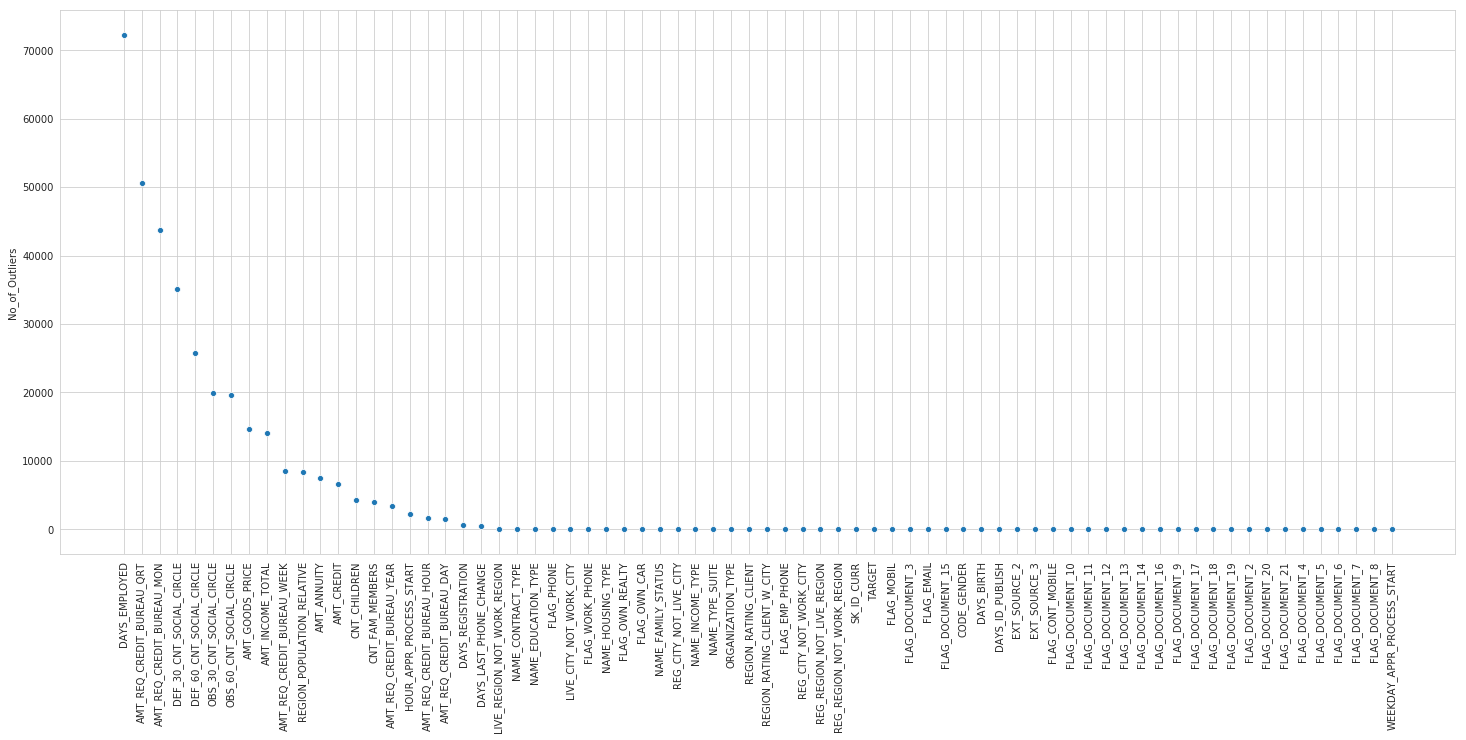

In [50]:
# Number of Numeric Data element in the application data and then determine if they are outlier or not
# So what the logic is we will get the the Q1 and Q4 and and IQR
# If any of the point is beyond the Q1 and Q4 i.e. < Q1 and >Q4, we will treat it as outlier
# We are getting the count of those outlier
# And then the Scatter PLot is plottter
print('Number of Numeric Data Type {0}'.format(len(application_data.select_dtypes(np.number).columns)))
get_num_col = application_data.select_dtypes(np.number).columns.tolist()
application_num_col = application_data[get_num_col]
Q1 = application_num_col.quantile(0.25)
Q3 = application_num_col.quantile(0.75)
IQR = Q3 - Q1
outlier_df = pd.DataFrame(((application_data < (Q1 - 1.5 * IQR)) | (application_data > (Q3 + 1.5 * IQR))).sum(), columns = ['No_of_Outliers'])
outlier_df = outlier_df.sort_values(by = ['No_of_Outliers'], ascending=False)
plt.figure(figsize=(25,10))
sns.scatterplot(x= outlier_df.index, y=outlier_df.No_of_Outliers)
plt.xticks(rotation=90)
plt.show()


As we can see from the above for most of the Columns the outlier equal to 0, but we can see there are few points where the outliers are more than 5000 and it 70000, lets try to find out

In [51]:
# Lets try to Find out why there are so much outlier, lets get the top 5 columns
outlier_df.head(5)

No_of_Outliers
DAYS_EMPLOYED                       72217
AMT_REQ_CREDIT_BUREAU_QRT           50575
AMT_REQ_CREDIT_BUREAU_MON           43759
DEF_30_CNT_SOCIAL_CIRCLE            35166
DEF_60_CNT_SOCIAL_CIRCLE            25769

Unique Value counts
 365243    55374
-200         156
-224         152
-199         151
-230         151
-212         150
-229         143
-384         143
-231         140
-215         138
Name: DAYS_EMPLOYED, dtype: int64
Statistics of the Series
count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


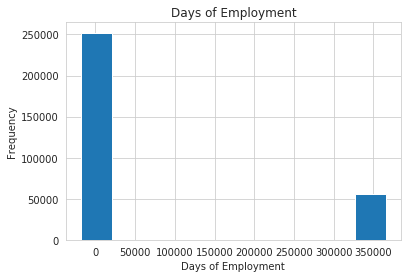

In [52]:
# Lets check the Stats of DAYS_EMPLOYED
# There are more than 70000, outliers
print("Unique Value counts")
print(application_data['DAYS_EMPLOYED'].value_counts().head(10))

print("============================================================================")
# So as we can see here there is a strange anomally
print("Statistics of the Series")
print(application_data['DAYS_EMPLOYED'].describe())

# The maximum seems to be 365243.000000, which is equivalent to 1000 year, is it really a correct data ? This doesn't lokks correct
# As we can also see the spread of data is huge( Std and Quantile Values) because of the max value and and the density of data points at that place, 

print("============================================================================")
# lets try to plot a histogram and check some spread
application_data['DAYS_EMPLOYED'].plot.hist(title = 'Days of Employment');
plt.xlabel('Days of Employment');
plt.show()

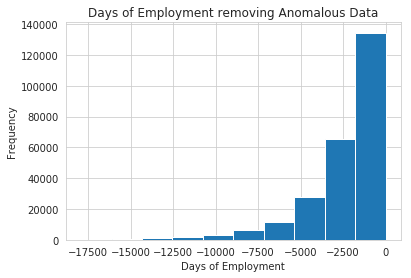

In [53]:
#This Field DAYS_EMPLOYED looks interesting
# As we clearly saw, the Anomaly is huge but interesting part is all of them happens on the same value, so the safest approach would be replace all the 365243 values with NaN
# And we would also create a new column to say whether it has some anomally or not
application_data['DAYS_EMPLOYED_IS_ANOMALY'] = application_data['DAYS_EMPLOYED'] == 365243
application_data['DAYS_EMPLOYED'].replace({365243:np.nan}, inplace = True)
application_data['DAYS_EMPLOYED'].plot.hist(title = 'Days of Employment removing Anomalous Data');
plt.xlabel('Days of Employment');
plt.show()
#Below Data looks good, as ther are less anomalies

####Let's analyze AMT_REQ_CREDIT_BUREAU_QRT

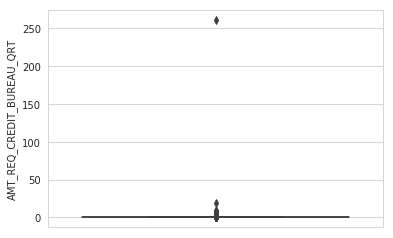

In [54]:
sns.boxplot(y = application_data['AMT_REQ_CREDIT_BUREAU_QRT'])

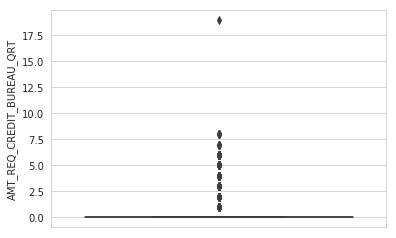

In [55]:
# As this point looks like an outlier so let's drop the row
index_to_drop = application_data[application_data['AMT_REQ_CREDIT_BUREAU_QRT'] > 50 ].index.tolist()[0]
application_data['AMT_REQ_CREDIT_BUREAU_QRT'].drop([index_to_drop], inplace = True)
sns.boxplot(y = application_data['AMT_REQ_CREDIT_BUREAU_QRT'])

In [56]:
application_data['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    265991.000000
mean          0.264494
std           0.612326
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          19.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

####Let's analyze AMT_REQ_CREDIT_BUREAU_MON

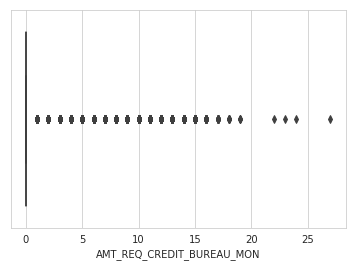

In [57]:
sns.boxplot(application_data['AMT_REQ_CREDIT_BUREAU_MON'])
# Ignoring this outlier as there are only few data points and most of the data points are concentrated between 0 and 1

So from above we can conclude for above three we got outlier and there are very few points in that outlier section, but for DAYS_EMPLOYED & it seems the error came because of a high outlier value, so we rectified that outlier by NaN and then we created the plot and then the plot looked little continous.
And for the AMT_REQ_CREDIT_BUREAU_QRT, we saw there are was an anomaly as there was a point which pretty large so we dropped that row

#### Lets try to convert some continuous random variable to bins 

In [58]:
#Binning
#Let's see how the variable DAYS_BIRTH has spreaded
#Getting rid of negative values
print('=============================')
application_data['DAYS_BIRTH'] = abs(application_data['DAYS_BIRTH'])
print(application_data['DAYS_BIRTH'].head(5))

0     9461
1    16765
2    19046
3    19005
4    19932
Name: DAYS_BIRTH, dtype: int64


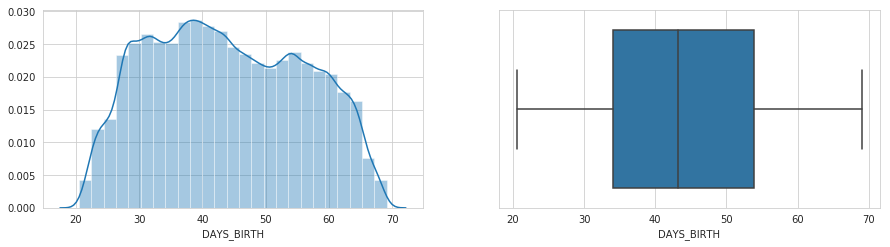

In [59]:
#Checking distribution of the variable
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.distplot(application_data['DAYS_BIRTH']/365, bins=25)
plt.subplot(222)
sns.boxplot(application_data['DAYS_BIRTH']/365)
plt.show()

As we can see there are no ouliers and data is perfectly balanced. But to visualise the effect on Target, we need to do visualise this on a better plot. Here, density plot or kdeplot has been used.

Text(0.5, 1.0, 'Distribution of Age')

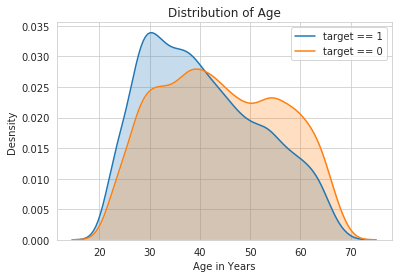

In [60]:
#KDE plot of the loans sanctioned that were not paid on time
sns.kdeplot(application_data.loc[application_data['TARGET']==1, 'DAYS_BIRTH'] / 365, label = 'target == 1', shade=True, bw = 2)
#KDE plot of the loans sanctioned that paid on time
sns.kdeplot(application_data.loc[application_data['TARGET']==0, 'DAYS_BIRTH'] / 365, label = 'target == 0', shade = True, bw = 2)
plt.xlabel('Age in Years')
plt.ylabel('Desnsity')
plt.title("Distribution of Age")

We can see clearly that for the target 1, the plot shows some imbalance around the age of 30. It implies, some age group are more likely to default than others. To visualise the age group clearly, let's plot a bar graph after binning the age group.

In [61]:
#Let's make a separate dataframe having just two variable, Target and Days_Birth
age_df = application_data[['TARGET','DAYS_BIRTH']]
age_df['DAYS_BIRTH'] = round(age_df['DAYS_BIRTH']/365,0)
#Making bins of age on 11 groups
# why 11 becase 70-20 = 50, and 50/5 = 10 + 1 for the upper boundary inclusive i.e. 70, hence 11
age_df['years binned'] = pd.cut(age_df['DAYS_BIRTH'], bins=np.linspace(20,70,11)) 
age_df.head(10)

TARGET  DAYS_BIRTH  years binned
0      1        26.0  (25.0, 30.0]
1      0        46.0  (45.0, 50.0]
2      0        52.0  (50.0, 55.0]
3      0        52.0  (50.0, 55.0]
4      0        55.0  (50.0, 55.0]
5      0        46.0  (45.0, 50.0]
6      0        38.0  (35.0, 40.0]
7      0        52.0  (50.0, 55.0]
8      0        55.0  (50.0, 55.0]
9      0        40.0  (35.0, 40.0]

In [0]:
# As data type of the Target is Object i.e. string, so it's difficult to compute mean below
age_df['TARGET'] = age_df.TARGET.astype(np.number)

In [63]:
#Now we can simply groupby bins and take average
age_df = age_df.groupby('years binned').mean()
age_df

TARGET  DAYS_BIRTH
years binned                      
(20.0, 25.0]  0.121086   23.609512
(25.0, 30.0]  0.111727   28.232196
(30.0, 35.0]  0.100854   32.969751
(35.0, 40.0]  0.088413   38.027623
(40.0, 45.0]  0.077393   42.940963
(45.0, 50.0]  0.073989   47.951609
(50.0, 55.0]  0.065655   53.062876
(55.0, 60.0]  0.054774   57.983749
(60.0, 65.0]  0.052917   62.873175
(65.0, 70.0]  0.034456   66.944281

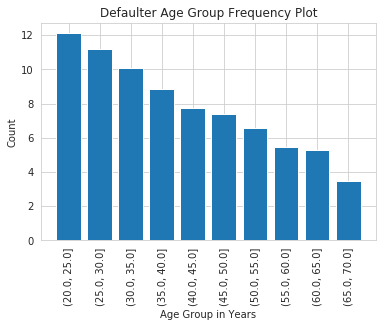

In [64]:
# Age Group Frequnecy Plot
plt.bar(age_df.index.astype(str), 100 * age_df['TARGET'])
plt.xticks(rotation = 90)
plt.xlabel('Age Group in Years')
plt.ylabel('Count')
plt.title('Defaulter Age Group Frequency Plot')
plt.show()

**Conclusion**

The insights which can drawn from above graph younger people are most likely the people who will fail to repay loan. As we see the trend decreases as the age bucket decreases. This field can draw a vital insights as using this field extra precaution can be taken so as to prevent defaulters

In [65]:
# This will help in getting the Categorical Values and their unique counts
application_data.select_dtypes(['object','category','bool']).apply(pd.Series.nunique, axis = 0).sort_values(ascending = False)

ORGANIZATION_TYPE              58
NAME_INCOME_TYPE                8
NAME_TYPE_SUITE                 7
WEEKDAY_APPR_PROCESS_START      7
NAME_FAMILY_STATUS              6
NAME_HOUSING_TYPE               6
NAME_EDUCATION_TYPE             5
CODE_GENDER                     3
REGION_RATING_CLIENT_W_CITY     3
REGION_RATING_CLIENT            3
DAYS_EMPLOYED_IS_ANOMALY        2
FLAG_PHONE                      2
REG_REGION_NOT_WORK_REGION      2
REG_REGION_NOT_LIVE_REGION      2
FLAG_EMAIL                      2
FLAG_EMP_PHONE                  2
FLAG_CONT_MOBILE                2
FLAG_WORK_PHONE                 2
REG_CITY_NOT_LIVE_CITY          2
FLAG_MOBIL                      2
FLAG_OWN_REALTY                 2
FLAG_OWN_CAR                    2
NAME_CONTRACT_TYPE              2
LIVE_REGION_NOT_WORK_REGION     2
REG_CITY_NOT_WORK_CITY          2
FLAG_DOCUMENT_21                2
LIVE_CITY_NOT_WORK_CITY         2
FLAG_DOCUMENT_20                2
FLAG_DOCUMENT_19                2
FLAG_DOCUMENT_

In [0]:
# As target is not of type Numeric it's difficult to compute mean and group my operation hence reverting back to the previous data type
application_data['TARGET'] = application_data['TARGET'].astype(np.number) 

#### Let's Analyze Categorical Variables w.r.t Target Field

In [0]:
def plot_show(column_name, rotation_required=False, horizonal_subplots= True):
    #Number of loans sanctioned for each category:
    sanctioned = application_data[column_name].value_counts()
    #Making dataframe containing number of loans sanctioned for each category
    df_sanctioned = pd.DataFrame({column_name : sanctioned.index, 'Number of loans sanctioned' : sanctioned.values})
    #Making subplots
    if(horizonal_subplots):
        fig, (plot1, plot2) = plt.subplots(ncols=2, figsize = (20,10))
    else:
        fig, (plot1, plot2) = plt.subplots(nrows=2, figsize = (20,14))
        plt.subplots_adjust(hspace=0.5) #To give some spacing between the plots

    #plotting the bar plot for df_sanctioned
    s = sns.barplot(ax = plot1, x=column_name, y='Number of loans sanctioned', data=df_sanctioned)
    s.set_yscale('log')
    if(rotation_required):
      s.set_xticklabels(s.get_xticklabels(),rotation=90)
    newdf1 = application_data[application_data['TARGET']==1]
    newdf0 = application_data[application_data['TARGET']==0]
    target_perc_1= 100*(newdf1[column_name].value_counts()/application_data[column_name].value_counts())
    target_perc_0= 100*(newdf0[column_name].value_counts()/application_data[column_name].value_counts())
    df_sanctioned.rename(index=df_sanctioned[column_name], inplace=True)
    df_sanctioned.drop(columns=column_name,inplace=True)
    # df_show = pd.concat([df_sanctioned,target_perc_1,target_perc_0],axis=1,keys=['','Target=1(in%)','Target=0(in%)'])
    df_show = pd.concat([target_perc_1,target_perc_0],axis=1,keys=['Target=1(in%)','Target=0(in%)'])
    df_show.sort_values(by = ['Target=0(in%)'] ).plot.bar( stacked=True, ax = plot2)
    plt.show()
    print(df_show.sort_values(by = ['Target=0(in%)']))

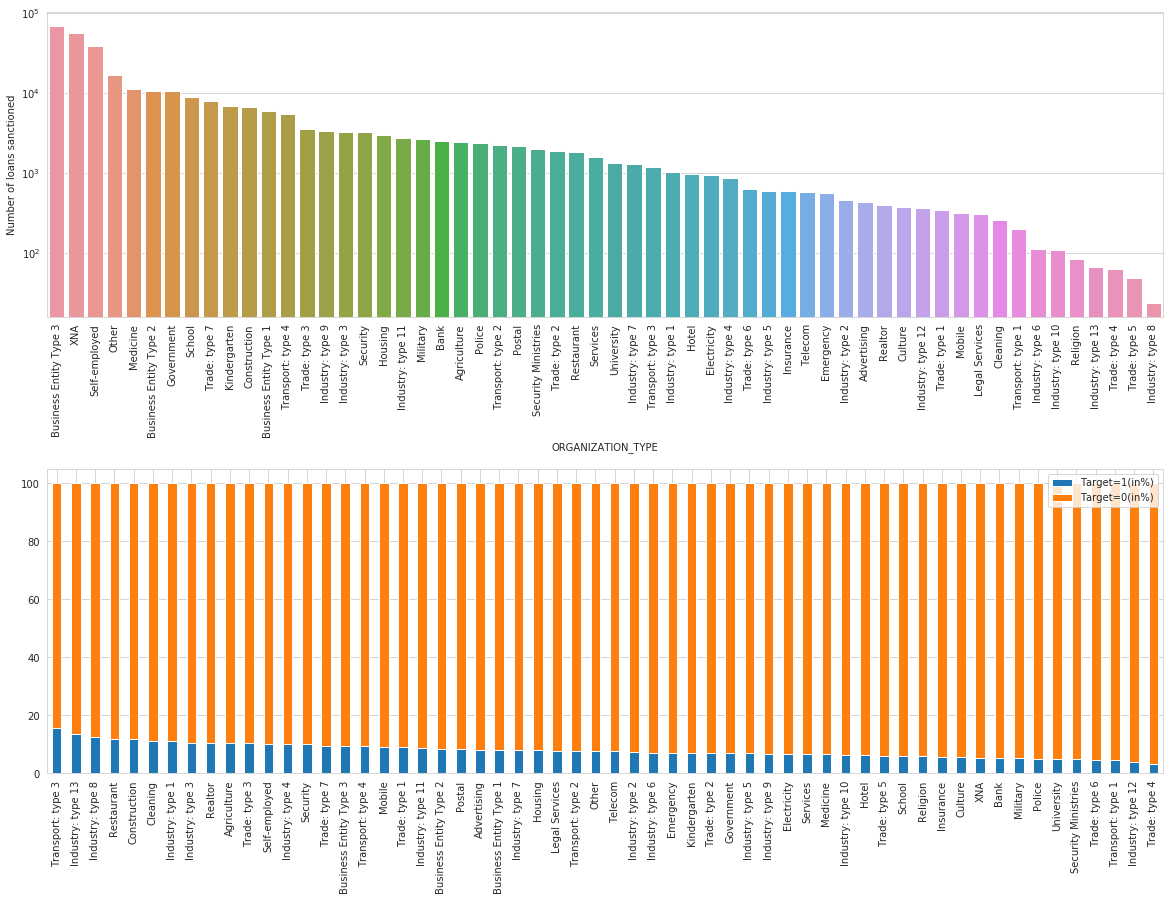

                        Target=1(in%)  Target=0(in%)
Transport: type 3           15.754002      84.245998
Industry: type 13           13.432836      86.567164
Industry: type 8            12.500000      87.500000
Restaurant                  11.706240      88.293760
Construction                11.679810      88.320190
Cleaning                    11.153846      88.846154
Industry: type 1            11.068335      88.931665
Industry: type 3            10.616229      89.383771
Realtor                     10.606061      89.393939
Agriculture                 10.472698      89.527302
Trade: type 3               10.337915      89.662085
Self-employed               10.173904      89.826096
Industry: type 4            10.148233      89.851767
Security                     9.978442      90.021558
Trade: type 7                9.449623      90.550377
Business Entity Type 3       9.299623      90.700377
Transport: type 4            9.281215      90.718785
Mobile                       9.148265      90.

In [68]:
plot_show('ORGANIZATION_TYPE',True, False)

**Conclusion**
As per the above analysis when we plotted Organization Type with Target Value, we found the top 5 organization type likely to default is 

1. Transport: type 3
2. Industry: type 13 
3. Industry: type 8
4. Restaurant 
5. Construction

And the top 5 organization, where it's least likely to be defaulter

1. Security Ministries  
2. Trade: type 6                
3. Transport: type 1 
4. Industry: type 12
5. Trade: type 4 





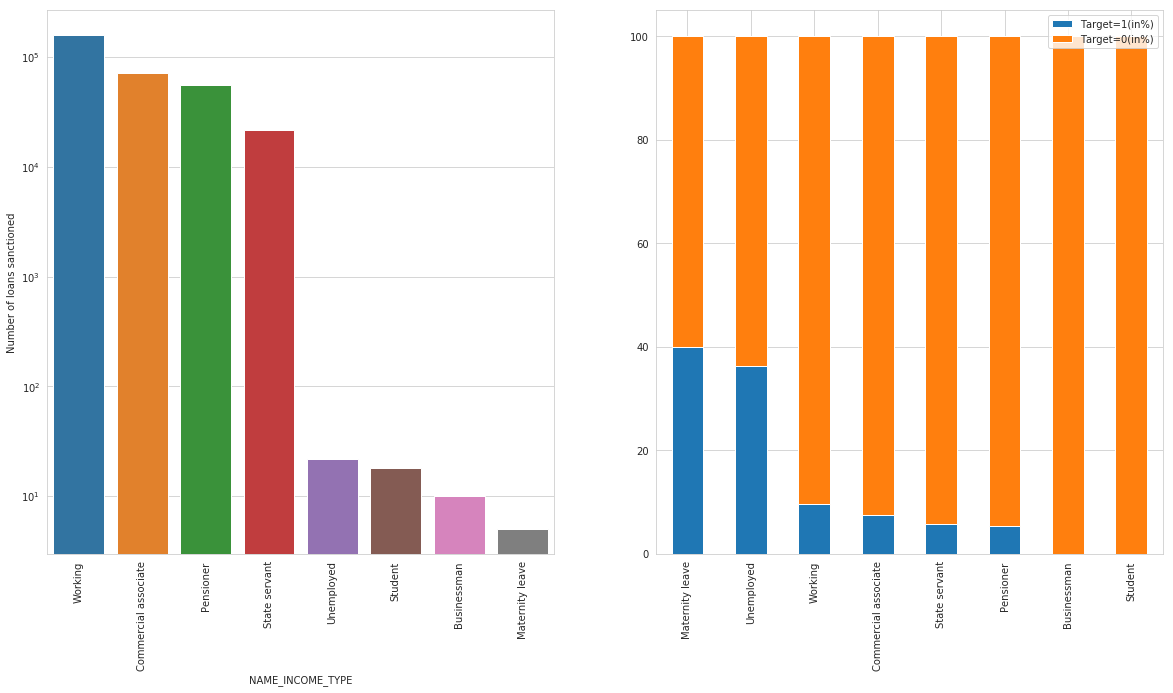

                      Target=1(in%)  Target=0(in%)
Maternity leave           40.000000      60.000000
Unemployed                36.363636      63.636364
Working                    9.588472      90.411528
Commercial associate       7.484257      92.515743
State servant              5.754965      94.245035
Pensioner                  5.386366      94.613634
Businessman                     NaN     100.000000
Student                         NaN     100.000000


In [69]:
plot_show('NAME_INCOME_TYPE',True)

**Conclusion** We can clearly see data imbalance here. Although the number of loans sanctioned for **Unemployed and Maternity** leave are very less, they are still more likely to default if we look into their %age having Target value 1, that are 36% and 40% respectively. While for the **Working**, **Commercial associate**, they are less likely to default.
And the most safest to invest in Income Type is **Businessman**,**student**


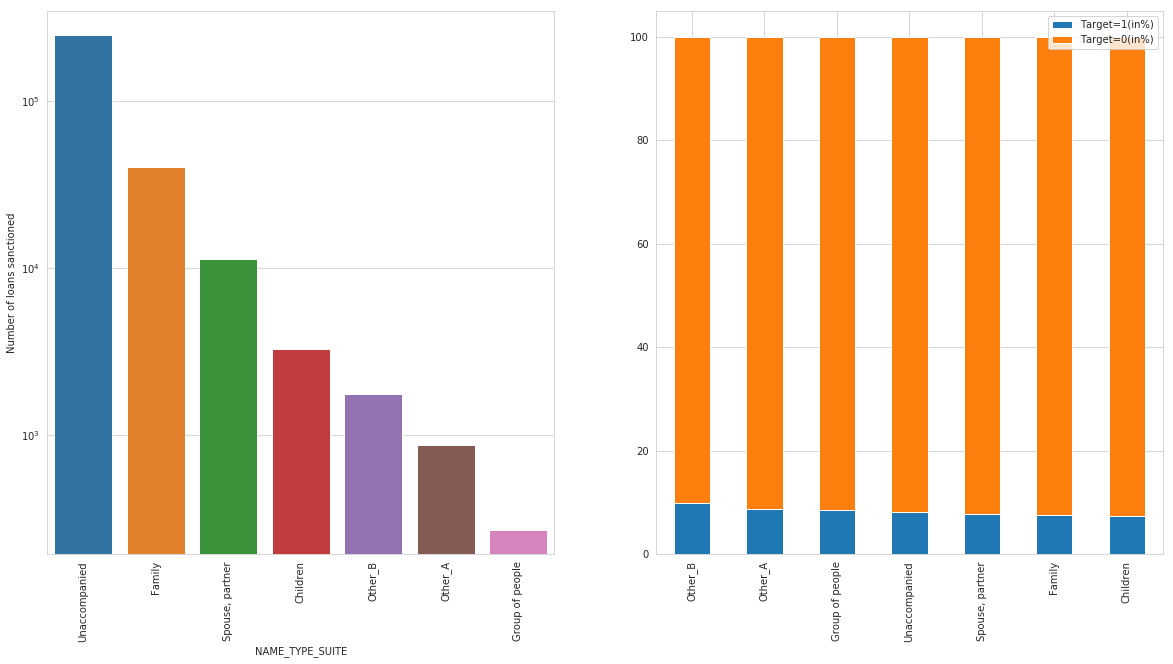

                 Target=1(in%)  Target=0(in%)
Other_B               9.830508      90.169492
Other_A               8.775982      91.224018
Group of people       8.487085      91.512915
Unaccompanied         8.183047      91.816953
Spouse, partner       7.871592      92.128408
Family                7.494583      92.505417
Children              7.376798      92.623202


In [70]:
plot_show('NAME_TYPE_SUITE',True) 

**Conclusion** As we can see the data is not so much balanced most of the data comprise for Unaccompanied hence most of the people are not accompanied by anyone when they apply for loan and when we see with respect to income type for all the types likely to default varies between the range ~7-10%, there is very negligible changes

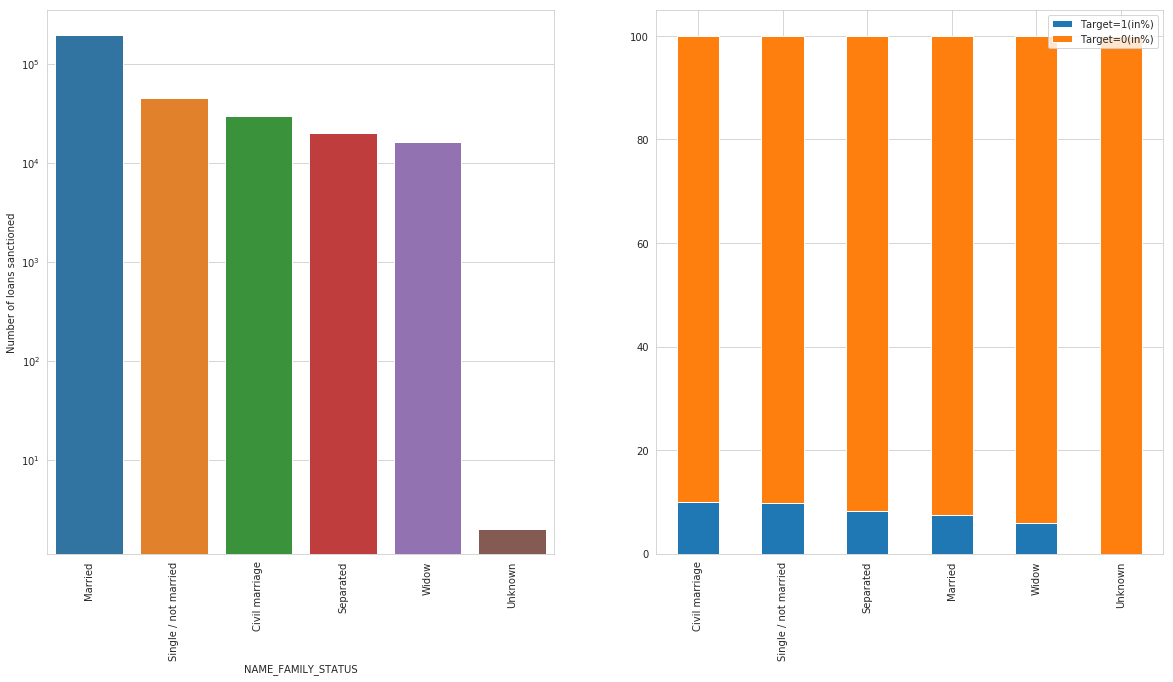

                      Target=1(in%)  Target=0(in%)
Civil marriage             9.944584      90.055416
Single / not married       9.807675      90.192325
Separated                  8.194234      91.805766
Married                    7.559868      92.440132
Widow                      5.824217      94.175783
Unknown                         NaN     100.000000


In [71]:
plot_show('NAME_FAMILY_STATUS',True)

**Conclusion** If we skip unknown, data are almost balanced except for Unknown ( which is very less ), for Civil Marriage & Single/not married the chance of being a defaulter is the most, ~10% and for married number of the data is so huge, the % of defaulter is equivalent to 7.5% , this leads to **marriage** people are the safest to invest for

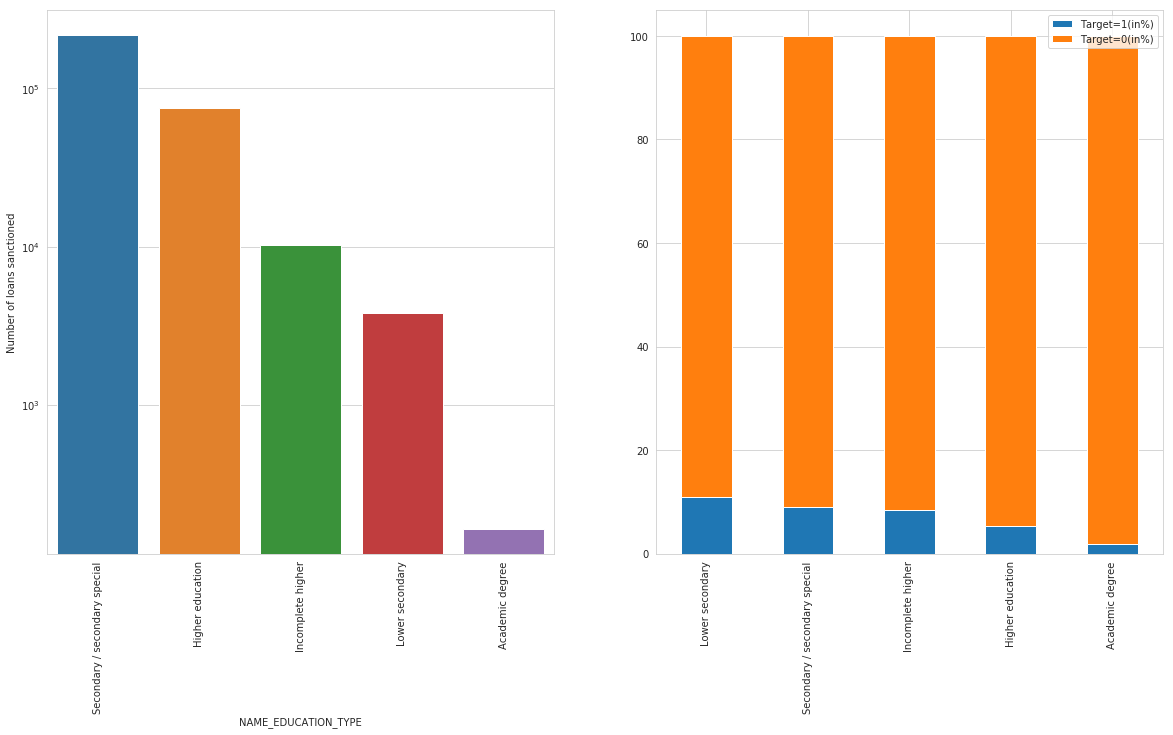

                               Target=1(in%)  Target=0(in%)
Lower secondary                    10.927673      89.072327
Secondary / secondary special       8.939929      91.060071
Incomplete higher                   8.484966      91.515034
Higher education                    5.355115      94.644885
Academic degree                     1.829268      98.170732


In [72]:
plot_show('NAME_EDUCATION_TYPE',True)

**Conclusion** Data is quite imbalanced here. We can say for higher education, chances of default is less as the number of loan sanctioned is significant with average Target as 5%, but for the high taret average which in this case is Lower Secondary, there is a strong chance they will be the highest defaulter and for the Secondary / secondary special  it's not safe to invest as it has the highest number of application and it's among top two of the defaulters list

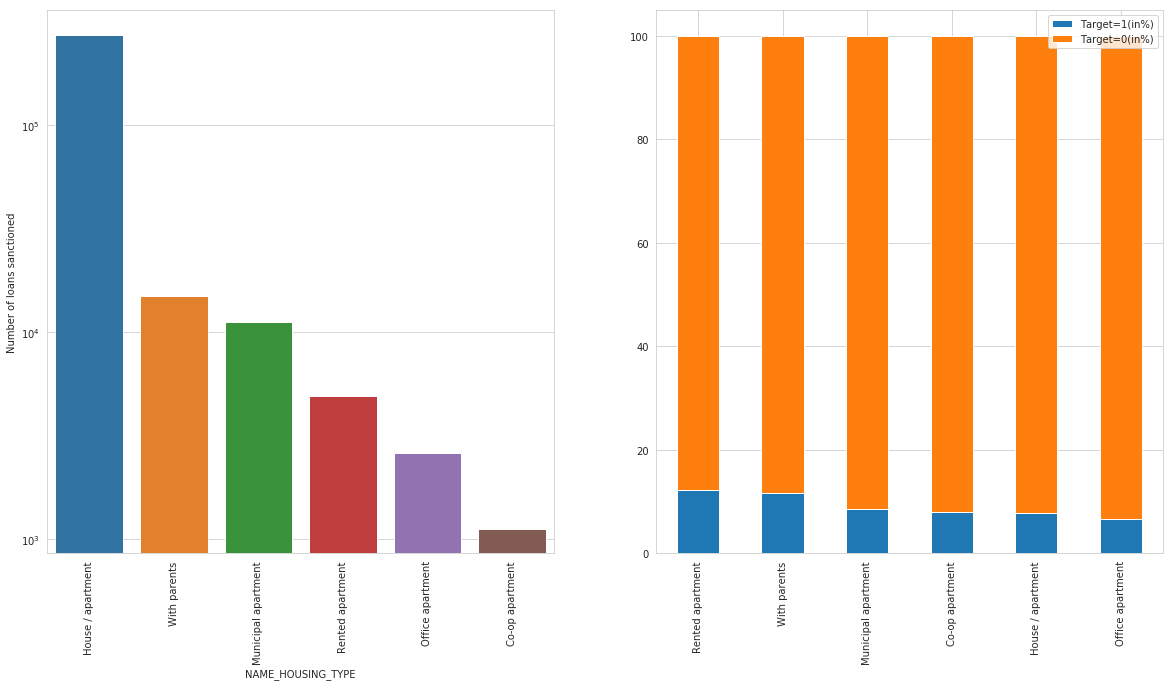

                     Target=1(in%)  Target=0(in%)
Rented apartment         12.313051      87.686949
With parents             11.698113      88.301887
Municipal apartment       8.539748      91.460252
Co-op apartment           7.932264      92.067736
House / apartment         7.795711      92.204289
Office apartment          6.572411      93.427589


In [73]:
plot_show('NAME_HOUSING_TYPE', rotation_required = True)

**Conclusions** For the House / apartment there is only ~8% chance of defaulter which is second from bottom so it seems to be the safest option.
But for With Parents and Rented apartment ~12% Defaulter is there so they are not the safest option at all

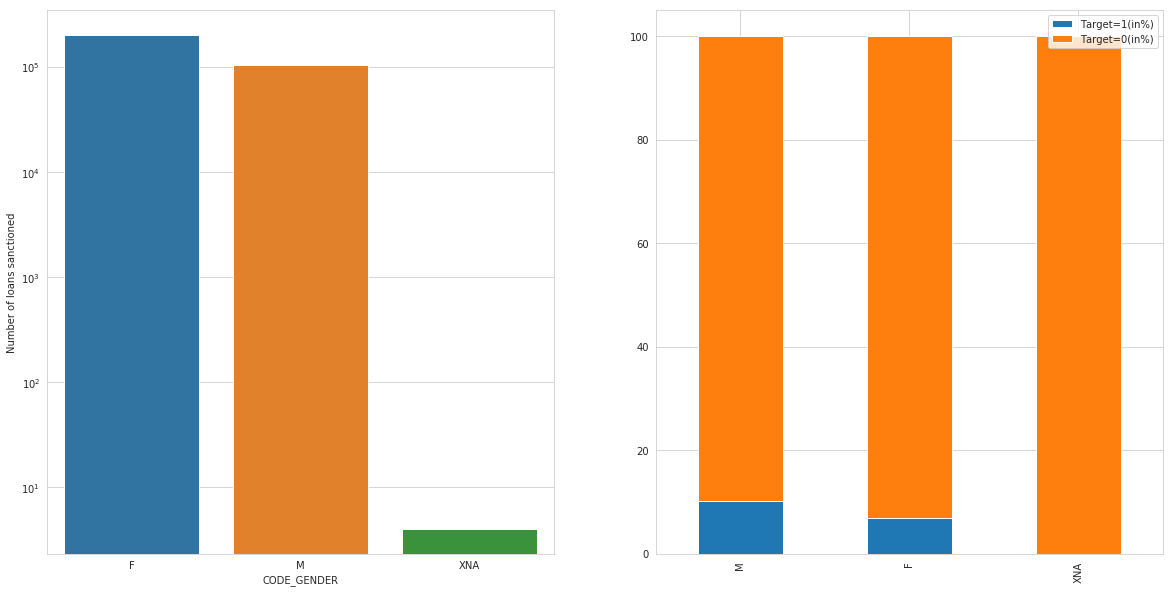

     Target=1(in%)  Target=0(in%)
M        10.141920      89.858080
F         6.999328      93.000672
XNA            NaN     100.000000


In [74]:
plot_show('CODE_GENDER') 

**Conclusion** Here the data looks balanced, & We can conclude from the above plot that female is less likely to default than a man.

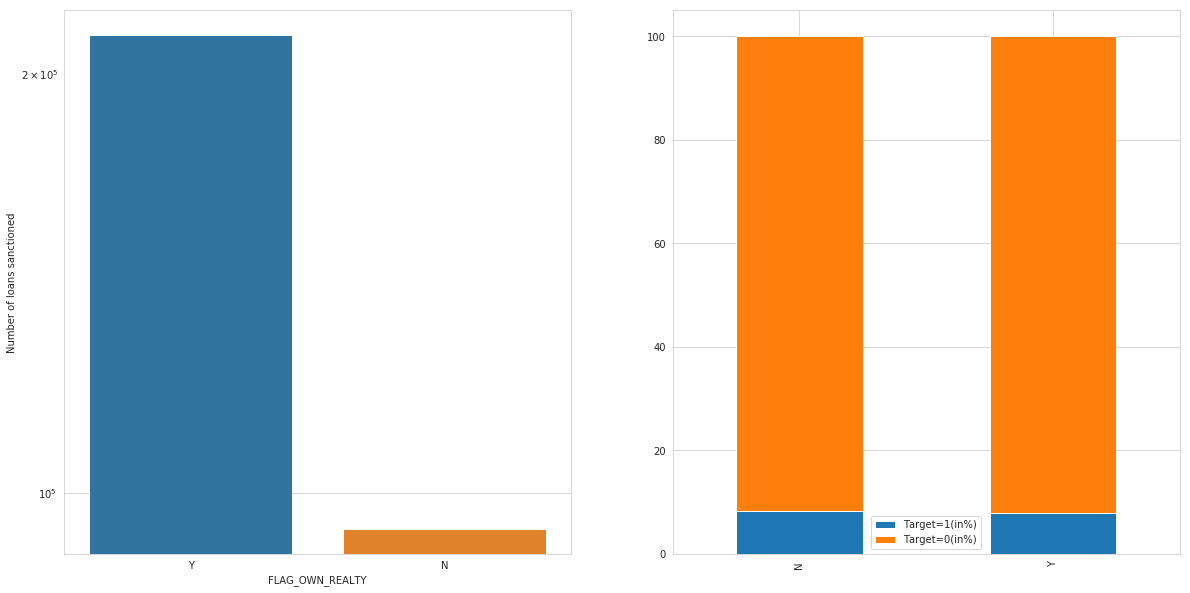

   Target=1(in%)  Target=0(in%)
N       8.324929      91.675071
Y       7.961577      92.038423


In [75]:
plot_show('FLAG_OWN_REALTY')

**Conclusion** We can see that data is imbalanced and average Targets for both the categories are almost same. ~8% chance of defaulter

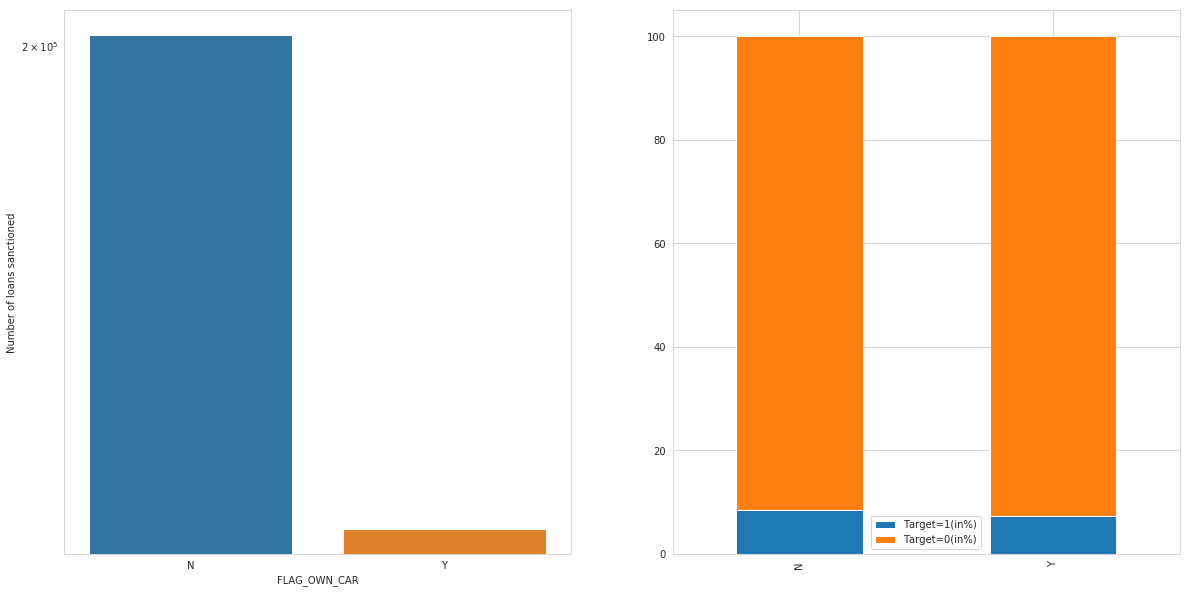

   Target=1(in%)  Target=0(in%)
N       8.500227      91.499773
Y       7.243730      92.756270


In [76]:
plot_show('FLAG_OWN_CAR')

**Conclusion** From the above plot, We can't make any conclusion as average Targets are really close and the data is imbalanced

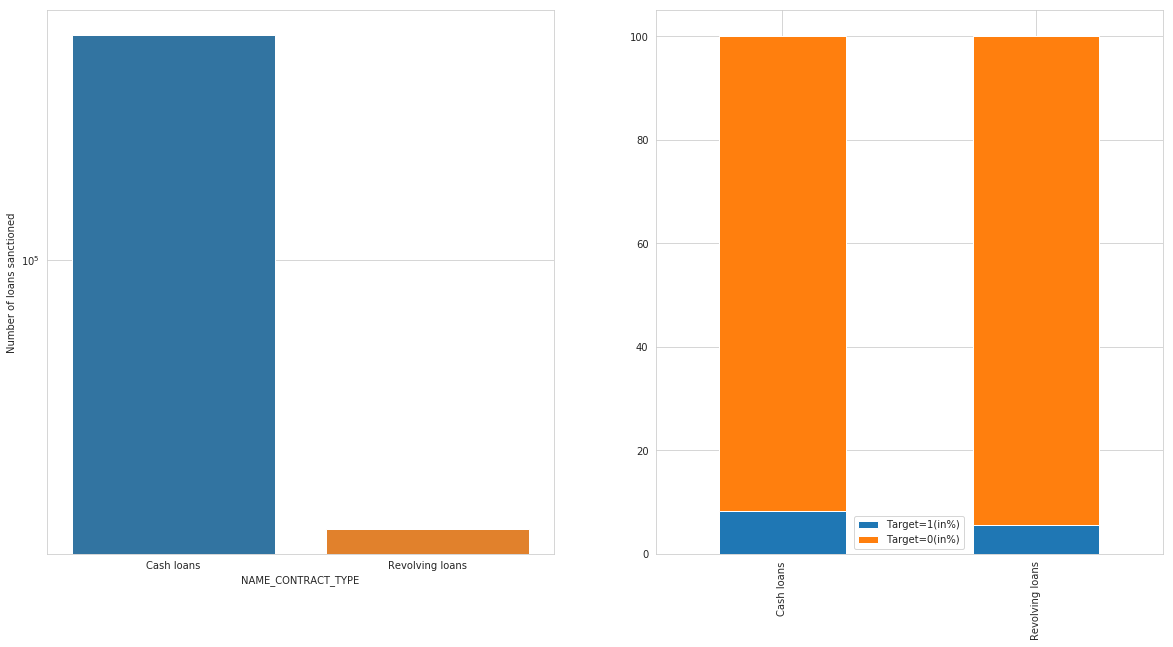

                 Target=1(in%)  Target=0(in%)
Cash loans            8.345913      91.654087
Revolving loans       5.478329      94.521671


In [77]:
plot_show('NAME_CONTRACT_TYPE')

**Conclusion** Contract type **Revolving loans** are just a small fraction (10%) from the total number of loans; in the same time, a larger amount of Revolving loans, comparing with their frequency, are not repaid. So here there can be two factor, one is data is quite imbalanced or mostly people are taking cash loans compared to revolving loan 

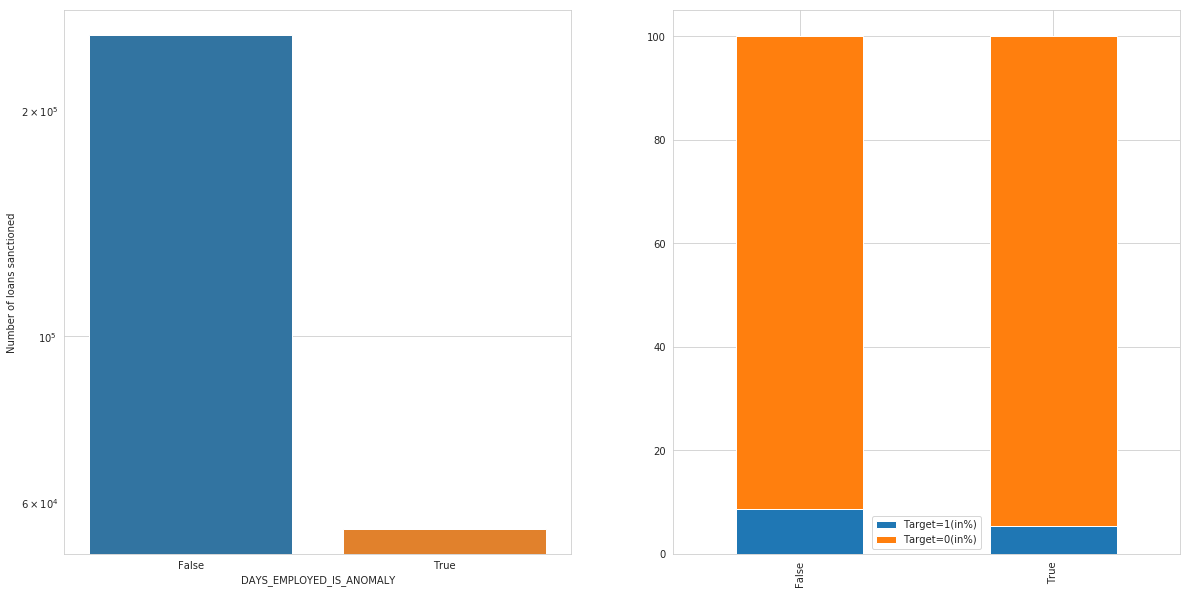

       Target=1(in%)  Target=0(in%)
False       8.659975      91.340025
True        5.399646      94.600354


In [78]:
plot_show('DAYS_EMPLOYED_IS_ANOMALY')

**Conclusion** This is a Derived column from DAYS_EMPLOYED, where Anlomaly values was 365243. The insight that can be drawn are , the client with the Anomalous Data are ~5% to default

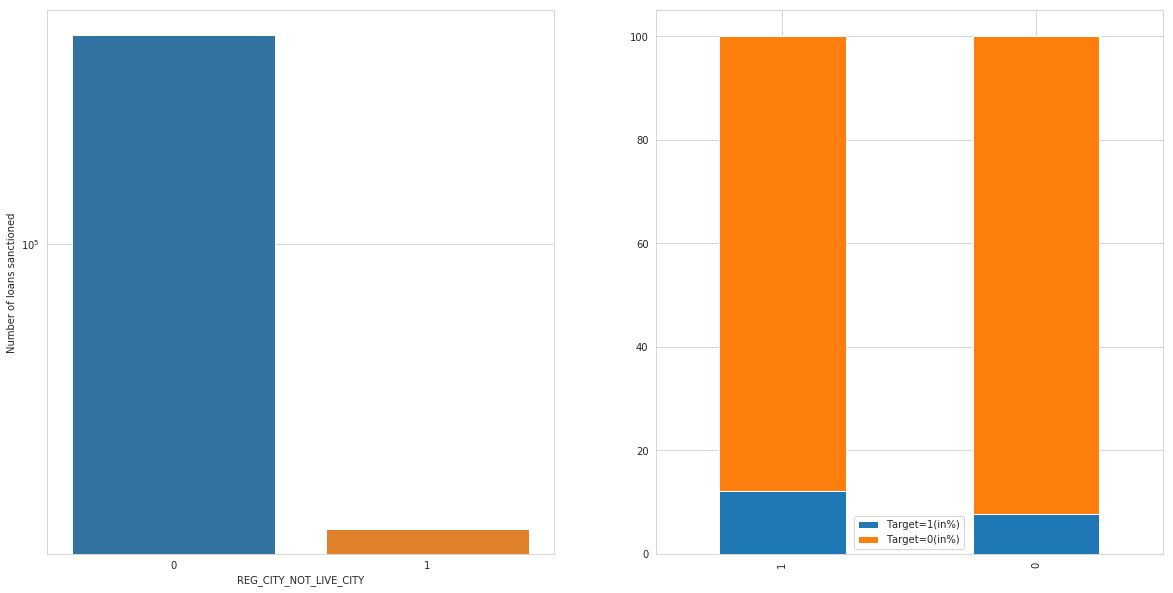

   Target=1(in%)  Target=0(in%)
1      12.225966      87.774034
0       7.720692      92.279308


In [79]:
plot_show('REG_CITY_NOT_LIVE_CITY')

**Conclusion**, here we can conclude No of loan application are more when the permanent adderss is equivalent to current address , those client will not likely to be a defaulter

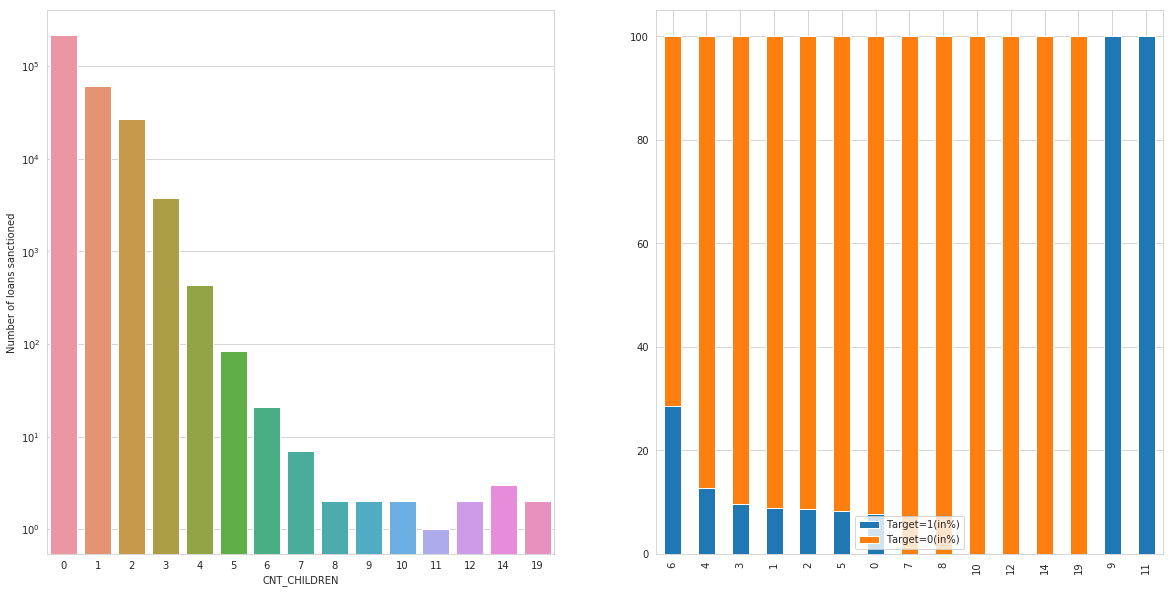

    Target=1(in%)  Target=0(in%)
6       28.571429      71.428571
4       12.820513      87.179487
3        9.631423      90.368577
1        8.923575      91.076425
2        8.721821      91.278179
5        8.333333      91.666667
0        7.711809      92.288191
7             NaN     100.000000
8             NaN     100.000000
10            NaN     100.000000
12            NaN     100.000000
14            NaN     100.000000
19            NaN     100.000000
9      100.000000            NaN
11     100.000000            NaN


In [80]:
plot_show('CNT_CHILDREN')

**Conclusion** For number of children greater than 6, as there are very less amount of data so we can't conclude whether they will be defaulter or not.
Clent having 4 or 6 no of children, they are most likely to not repay the loan
Client having 0 childern, they are the safest to give loan to as they show only  ~7% of default rate 

#### Let's analyze the Numerical variable with Target Value

In [0]:
#Getting all the numeric Data Tupes
col_name = application_data.select_dtypes(np.number).columns.tolist()
# Removing TARGET Datatype from the list as it's shouldn't be considered for numerical analysis
col_name.remove('TARGET')

In [82]:
# Before proceeding with any further analysis we have check whether any null values are there or not
# Removing all the Null Values
application_data.select_dtypes(np.number).isnull().sum().sort_values(ascending=False)

DAYS_EMPLOYED                 55374
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
EXT_SOURCE_2                    660
AMT_ANNUITY                      12
CNT_FAM_MEMBERS                   2
DAYS_LAST_PHONE_CHANGE            1
TARGET                            0
AMT_GOODS_PRICE                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_REQ_CREDIT_BUREAU_YEAR        0
HOUR_APPR_PROCESS_START           0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
EXT_SOURCE_3                      0
SK_ID_CURR                        0
dtype: int64

In [0]:
#Imputing all the NaNs for the variable "DAYS_EMPLOYED" with median. As the data is skewed, imputing the median will be the appropriate option.
application_data['DAYS_EMPLOYED'].replace({np.nan:application_data['DAYS_EMPLOYED'].median()},inplace=True) 

count    307511.000000
mean      -2251.606131
std        2136.193492
min      -17912.000000
25%       -2760.000000
50%       -1648.000000
75%        -933.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64


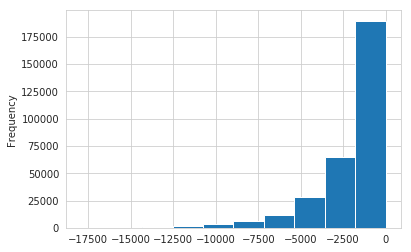

In [84]:
#Checking Characteristics
print(application_data['DAYS_EMPLOYED'].describe())
application_data['DAYS_EMPLOYED'].plot.hist()

Text(0.5, 0, 'AMT_REQ_CREDIT_BUREAU_QRT')

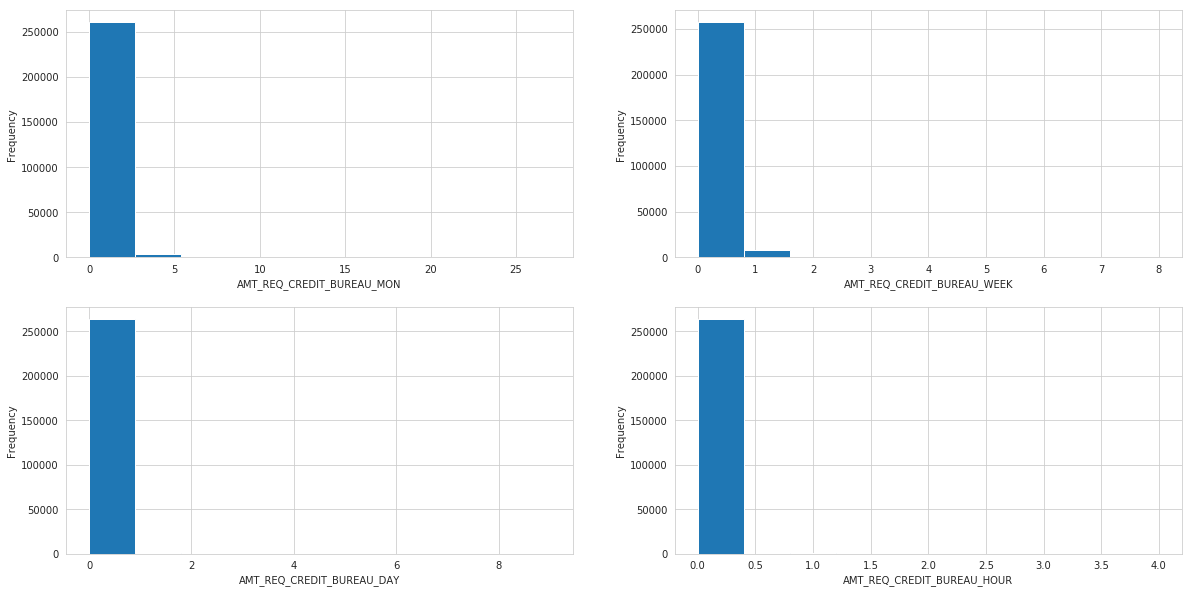

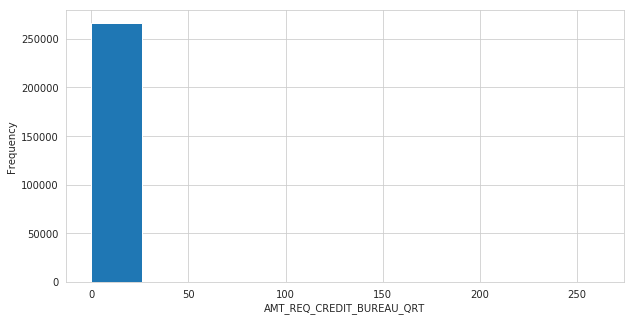

In [85]:
#Checking the distribution of AMT_REQ_CREDIT_BUREAU(Five such columns) with histogram

fig , ax = plt.subplots(2,2, figsize=(20, 10))

application_data['AMT_REQ_CREDIT_BUREAU_MON'].plot.hist(ax=ax[0,0]).set_xlabel('AMT_REQ_CREDIT_BUREAU_MON')
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].plot.hist(ax=ax[0,1]).set_xlabel('AMT_REQ_CREDIT_BUREAU_WEEK')
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].plot.hist(ax=ax[1,0]).set_xlabel('AMT_REQ_CREDIT_BUREAU_DAY')
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].plot.hist(ax=ax[1,1]).set_xlabel('AMT_REQ_CREDIT_BUREAU_HOUR')
plt.figure(2,figsize=(10, 5))
application_data['AMT_REQ_CREDIT_BUREAU_QRT'].plot.hist().set_xlabel('AMT_REQ_CREDIT_BUREAU_QRT')



In [0]:
##Imputing all the NaNs for the variable "AMT_REQ_CREDIT_BUREAU" with median.
# Why median because the data is skewed 
application_data['AMT_REQ_CREDIT_BUREAU_QRT'].replace({np.nan:application_data['AMT_REQ_CREDIT_BUREAU_QRT'].median()},inplace=True)
application_data['AMT_REQ_CREDIT_BUREAU_MON'].replace({np.nan:application_data['AMT_REQ_CREDIT_BUREAU_MON'].median()},inplace=True)
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].replace({np.nan:application_data['AMT_REQ_CREDIT_BUREAU_DAY'].median()},inplace=True)
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].replace({np.nan:application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].median()},inplace=True)
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].replace({np.nan:application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].median()},inplace=True)

In [87]:
#Checking Characteristics after imputing
print(application_data['AMT_REQ_CREDIT_BUREAU_QRT'].describe())
print('________________________________________')
print(application_data['AMT_REQ_CREDIT_BUREAU_MON'].describe())
print('________________________________________')
print(application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].describe())
print('________________________________________')
print(application_data['AMT_REQ_CREDIT_BUREAU_DAY'].describe())
print('________________________________________')
print(application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].describe())

count    307511.000000
mean          0.229631
std           0.744059
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64
________________________________________
count    307511.000000
mean          0.231293
std           0.856810
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64
________________________________________
count    307511.000000
mean          0.029723
std           0.190728
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64
________________________________________
count    307511.000000
mean          0.006055
std           0.103037
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000

Text(0.5, 0, 'DEF_60_CNT_SOCIAL_CIRCLE')

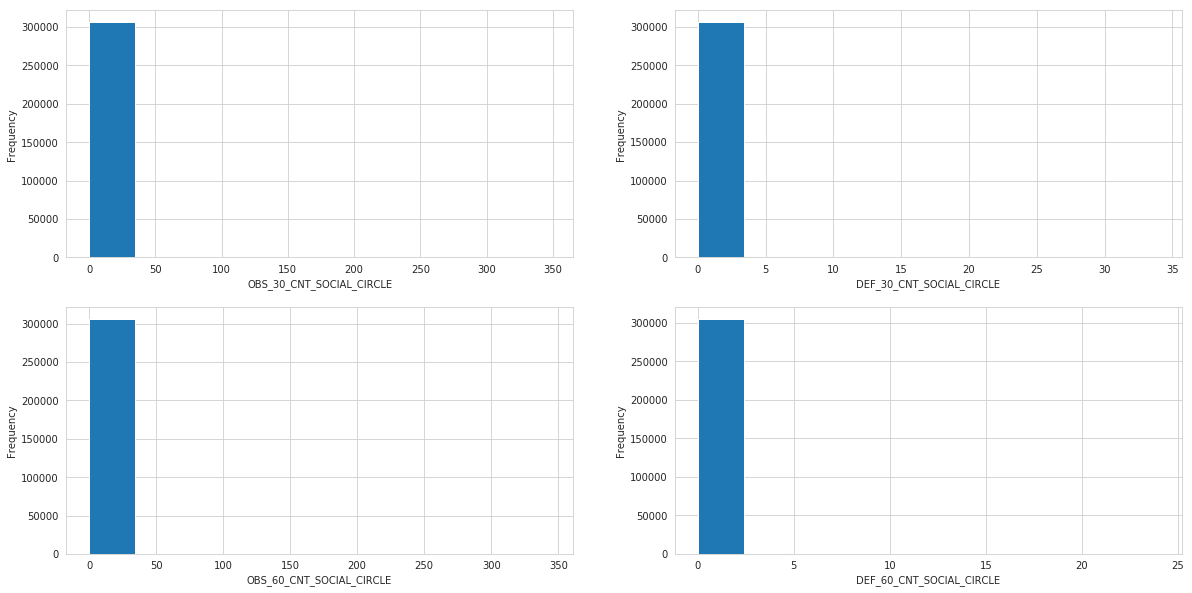

In [88]:
#Checking the distribution of CNT_SOCIAL_CIRCLE(Four such columns) with histogram

fig , ax = plt.subplots(2,2, figsize=(20, 10))

application_data['OBS_30_CNT_SOCIAL_CIRCLE'].plot.hist(ax=ax[0,0]).set_xlabel('OBS_30_CNT_SOCIAL_CIRCLE')
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].plot.hist(ax=ax[0,1]).set_xlabel('DEF_30_CNT_SOCIAL_CIRCLE')
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].plot.hist(ax=ax[1,0]).set_xlabel('OBS_60_CNT_SOCIAL_CIRCLE')
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].plot.hist(ax=ax[1,1]).set_xlabel('DEF_60_CNT_SOCIAL_CIRCLE')

In [0]:
##Imputing all the NaNs for the variable "CNT_SOCIAL_CIRCLE" with median.

application_data['OBS_30_CNT_SOCIAL_CIRCLE'].replace({np.nan:application_data['OBS_30_CNT_SOCIAL_CIRCLE'].median()},inplace=True)
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].replace({np.nan:application_data['DEF_30_CNT_SOCIAL_CIRCLE'].median()},inplace=True)
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].replace({np.nan:application_data['OBS_60_CNT_SOCIAL_CIRCLE'].median()},inplace=True)
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].replace({np.nan:application_data['DEF_60_CNT_SOCIAL_CIRCLE'].median()},inplace=True)

In [90]:
#Checking Characteristics after imputing
print(application_data['OBS_30_CNT_SOCIAL_CIRCLE'].describe())
print('________________________________________')
print(application_data['DEF_30_CNT_SOCIAL_CIRCLE'].describe())
print('________________________________________')
print(application_data['OBS_60_CNT_SOCIAL_CIRCLE'].describe())
print('________________________________________')
print(application_data['DEF_60_CNT_SOCIAL_CIRCLE'].describe())

count    307511.000000
mean          1.417523
std           2.398395
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64
________________________________________
count    307511.000000
mean          0.142944
std           0.446033
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64
________________________________________
count    307511.000000
mean          1.400626
std           2.377224
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64
________________________________________
count    307511.000000
mean          0.099717
std           0.361735
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000


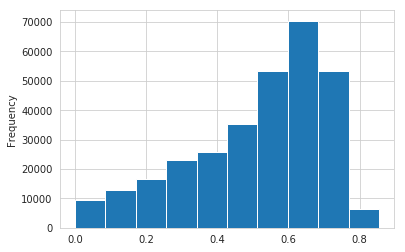

In [91]:
#Checking the distribution of EXT_SOURCE_2 with histogram

application_data['EXT_SOURCE_2'].plot.hist()

In [0]:
##Imputing all the NaNs for the variable "EXT_SOURCE_2" with mean as the looks looks well andm mean looks little close to median.
application_data['EXT_SOURCE_2'].replace({np.nan:application_data['EXT_SOURCE_2'].mean()},inplace=True)

In [93]:
#Checking Characteristics after imputing
application_data['EXT_SOURCE_2'].describe()

count    3.075110e+05
mean     5.143927e-01
std      1.908550e-01
min      8.173617e-08
25%      3.929737e-01
50%      5.654672e-01
75%      6.634218e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

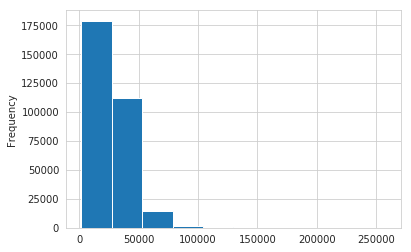

In [94]:
#Checking the distribution of AMT_ANNUITY with histogram
application_data['AMT_ANNUITY'].plot.hist()

In [0]:
##Imputing all the NaNs for the variable "AMT_ANNUITY" with median.
application_data['AMT_ANNUITY'].replace({np.nan:application_data['AMT_ANNUITY'].median()},inplace=True)

In [96]:
#Checking Characteristics after imputing
application_data['AMT_ANNUITY'].describe()

count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [97]:
#Checking the value counts for the variable CNT_FAM_MEMBERS
application_data['CNT_FAM_MEMBERS'].value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [98]:
#Checking Characteristics
application_data['CNT_FAM_MEMBERS'].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [0]:
#The data seems to be more deviated towards mode, we can impute mode in the missing values it seems more like a categorical value/ ordered categorical value
application_data['CNT_FAM_MEMBERS'].replace({np.nan:application_data['CNT_FAM_MEMBERS'].mode()[0]},inplace=True)

In [0]:
application_data['CNT_FAM_MEMBERS'].replace({np.nan:application_data['CNT_FAM_MEMBERS'].mode()[0]},inplace=True)

In [101]:
#Checking Characteristics after imputing
application_data['DAYS_LAST_PHONE_CHANGE'].describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

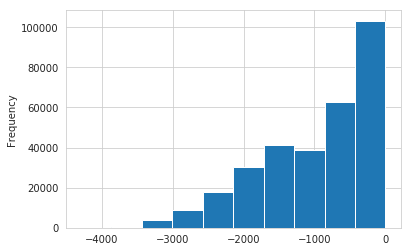

In [102]:
#Ploting the graph
application_data['DAYS_LAST_PHONE_CHANGE'].plot.hist()

In [0]:
#Imputing the missing value with Median
application_data['DAYS_LAST_PHONE_CHANGE'].replace({np.nan:application_data['DAYS_LAST_PHONE_CHANGE'].median()},inplace=True)

In [104]:
#Selecting the Null Values statistics
application_data.select_dtypes(np.number).isnull().sum().sort_values(ascending=False)

AMT_REQ_CREDIT_BUREAU_YEAR    0
CNT_FAM_MEMBERS               0
TARGET                        0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
DAYS_ID_PUBLISH               0
HOUR_APPR_PROCESS_START       0
AMT_REQ_CREDIT_BUREAU_QRT     0
EXT_SOURCE_2                  0
EXT_SOURCE_3                  0
OBS_30_CNT_SOCIAL_CIRCLE      0
DEF_30_CNT_SOCIAL_CIRCLE      0
OBS_60_CNT_SOCIAL_CIRCLE      0
DEF_60_CNT_SOCIAL_CIRCLE      0
DAYS_LAST_PHONE_CHANGE        0
AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
SK_ID_CURR                    0
dtype: int64

In [105]:
#Now let's see any negative values are there or not
# Why we need is when we will try to get the top 10 features with high Correlation, we will face issue
print("Number of Columns Found are :{}".format((application_data[col_name] < 0).any().sum()))
(application_data[col_name] < 0).any()

Number of Columns Found are :4


SK_ID_CURR                    False
CNT_CHILDREN                  False
AMT_INCOME_TOTAL              False
AMT_CREDIT                    False
AMT_ANNUITY                   False
AMT_GOODS_PRICE               False
REGION_POPULATION_RELATIVE    False
DAYS_BIRTH                    False
DAYS_EMPLOYED                  True
DAYS_REGISTRATION              True
DAYS_ID_PUBLISH                True
CNT_FAM_MEMBERS               False
HOUR_APPR_PROCESS_START       False
EXT_SOURCE_2                  False
EXT_SOURCE_3                  False
OBS_30_CNT_SOCIAL_CIRCLE      False
DEF_30_CNT_SOCIAL_CIRCLE      False
OBS_60_CNT_SOCIAL_CIRCLE      False
DEF_60_CNT_SOCIAL_CIRCLE      False
DAYS_LAST_PHONE_CHANGE         True
AMT_REQ_CREDIT_BUREAU_HOUR    False
AMT_REQ_CREDIT_BUREAU_DAY     False
AMT_REQ_CREDIT_BUREAU_WEEK    False
AMT_REQ_CREDIT_BUREAU_MON     False
AMT_REQ_CREDIT_BUREAU_QRT     False
AMT_REQ_CREDIT_BUREAU_YEAR    False
dtype: bool

In [106]:
# Removing the negative values
application_data[col_name] = abs(application_data[col_name])
application_data[col_name].head()

SK_ID_CURR  ...  AMT_REQ_CREDIT_BUREAU_YEAR
0    100002.0  ...                         1.0
1    100003.0  ...                         0.0
2    100004.0  ...                         0.0
3    100006.0  ...                         0.0
4    100007.0  ...                         0.0

[5 rows x 26 columns]

In [107]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = application_data[col_name]
y = application_data['TARGET']
bestfeatures = SelectKBest(score_func=chi2, k= 10)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

feature_score = pd.concat([dfcolumns, dfscores], axis = 1)
feature_score.columns = ['Specs', 'Score']
print(feature_score.nlargest(10,'Score'))
col_names = feature_score.nlargest(10,'Score')['Specs'].values

                     Specs         Score
5          AMT_GOODS_PRICE  1.223153e+08
3               AMT_CREDIT  7.669987e+07
8            DAYS_EMPLOYED  2.502588e+06
7               DAYS_BIRTH  2.235391e+06
2         AMT_INCOME_TOTAL  1.624102e+06
9        DAYS_REGISTRATION  1.348566e+06
19  DAYS_LAST_PHONE_CHANGE  6.656876e+05
10         DAYS_ID_PUBLISH  6.195946e+05
4              AMT_ANNUITY  3.913092e+05
0               SK_ID_CURR  5.192425e+04


In [108]:
#Checking the correlation
correlations = application_data[col_names].corr()
correlations

AMT_GOODS_PRICE  AMT_CREDIT  ...  AMT_ANNUITY  SK_ID_CURR
AMT_GOODS_PRICE                1.000000    0.986588  ...     0.774661   -0.000232
AMT_CREDIT                     0.986588    1.000000  ...     0.770127   -0.000343
DAYS_EMPLOYED                  0.093047    0.091447  ...     0.062342   -0.000105
DAYS_BIRTH                     0.053416    0.055436  ...    -0.009443    0.001500
AMT_INCOME_TOTAL               0.159600    0.156870  ...     0.191657   -0.001820
DAYS_REGISTRATION             -0.011561   -0.009621  ...    -0.038514    0.000973
DAYS_LAST_PHONE_CHANGE         0.076289    0.073702  ...     0.063746    0.000859
DAYS_ID_PUBLISH                0.009262    0.006575  ...    -0.011267    0.000384
AMT_ANNUITY                    0.774661    0.770127  ...     1.000000   -0.000431
SK_ID_CURR                    -0.000232   -0.000343  ...    -0.000431    1.000000

[10 rows x 10 columns]

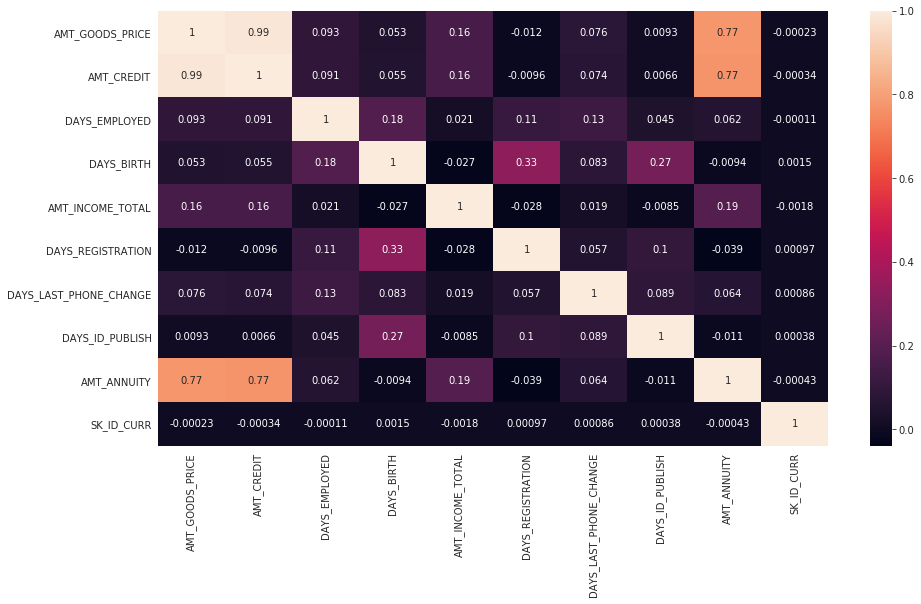

In [109]:
#plotting the heatmap
plt.figure(figsize=(15,8))
sns.heatmap(correlations,annot=True)

In [110]:
print(correlations.abs().unstack().sort_values(ascending=False)[correlations.abs().unstack().sort_values(ascending=False)!=1].head(10))

AMT_CREDIT         AMT_GOODS_PRICE      0.986588
AMT_GOODS_PRICE    AMT_CREDIT           0.986588
AMT_ANNUITY        AMT_GOODS_PRICE      0.774661
AMT_GOODS_PRICE    AMT_ANNUITY          0.774661
AMT_CREDIT         AMT_ANNUITY          0.770127
AMT_ANNUITY        AMT_CREDIT           0.770127
DAYS_REGISTRATION  DAYS_BIRTH           0.331912
DAYS_BIRTH         DAYS_REGISTRATION    0.331912
DAYS_ID_PUBLISH    DAYS_BIRTH           0.272691
DAYS_BIRTH         DAYS_ID_PUBLISH      0.272691
dtype: float64


**Conclusion:** In the above correlation matrix, the variables with top correlation with Target and the pairs which have highest correlation in that list have been shown.

1. AMT_GOODS_PRICE |   AMT_CREDIT           
2. AMT_ANNUITY     |   AMT_GOODS_PRICE      
3. AMT_CREDIT      |   AMT_ANNUITY          
4. DAYS_BIRTH      |   DAYS_REGISTRATION    
5. DAYS_BIRTH      |   DAYS_ID_PUBLISH      

**Conclusion**
There issome normalization required work work is still in progress
Let's try to analyze two major cluster in this plot ( as we can see some variables are highly correlated)
**AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE**

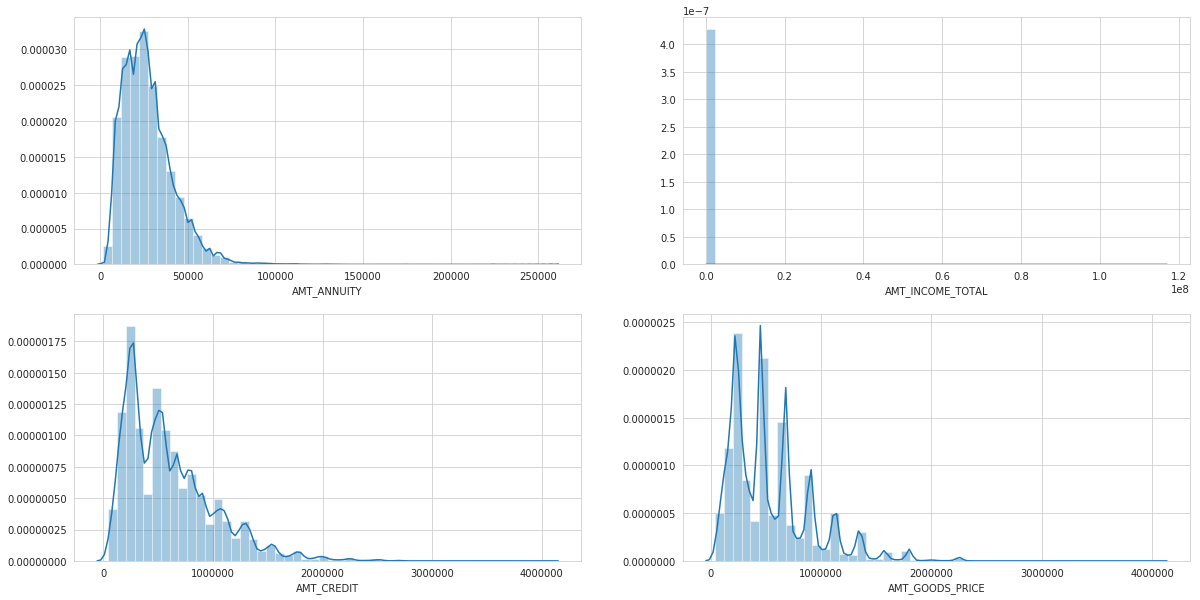

In [111]:
# Let's try to analyze two major cluster in this plot ( as we can see some variables are highly correlated)
#AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE
fig , ax = plt.subplots(2,2, figsize=(20, 10))

sns.distplot(application_data.AMT_ANNUITY.dropna(), kde=True, ax=ax[0,0])
sns.distplot(application_data.AMT_INCOME_TOTAL.dropna(), kde=True, ax=ax[0,1])
sns.distplot(application_data.AMT_CREDIT.dropna(), kde=True, ax=ax[1,0])
sns.distplot(application_data.AMT_GOODS_PRICE.dropna(), kde=True, ax=ax[1,1])
plt.show()

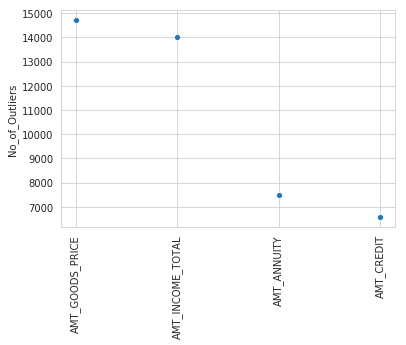

In [112]:
# There are few observation which were drawn above for the below columns 
# The problem is the scale is very huge for all the columns and there are lot of outliers so this needs to be identified and then we can analyze it per feature
# why we decided to to do the outlier calculation, because it's very diffucult to come to conclusion if we are planning to do some univariate analysis, so what we can
# see from the above plot for the AMT_INCOME_TOTAL the plot distribution/kde is not coming itself as it has a lot of outlier
# So below plot show us the outlier
data = application_data[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']]
get_num_col = data.columns.tolist()
application_num_col = data[get_num_col]
Q1 = application_num_col.quantile(0.25)
Q3 = application_num_col.quantile(0.75)
IQR = Q3 - Q1
outlier_df = pd.DataFrame(((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum(), columns = ['No_of_Outliers'])
outlier_df = outlier_df.sort_values(by = ['No_of_Outliers'], ascending=False)
sns.scatterplot(x= outlier_df.index, y=outlier_df.No_of_Outliers)
plt.xticks(rotation=90)
plt.show()

We can see for all four we have some outlier, so we removed the outlier specific to the column

In [0]:
# This a crude we of doing analysis, but we planned to take a call
# This function will drop all the outlier values and then we try to plot the values
# Why we consider this plot analysis so as to see the trend prior to doing Bivariate Analysis
def plot_removing_outlier(col_name, ax, row, col):
  application_num_col = application_data[col_name].dropna()
  Q1 = application_num_col.quantile(0.25)
  Q3 = application_num_col.quantile(0.75)
  IQR = Q3 - Q1
  curr_data = application_num_col.loc[~((application_num_col < (Q1 - 1.5 * IQR)) | (application_num_col > (Q3 + 1.5 * IQR)))].sort_values(ascending=False)
  sns.distplot(curr_data, kde=True, ax = ax[row,col])

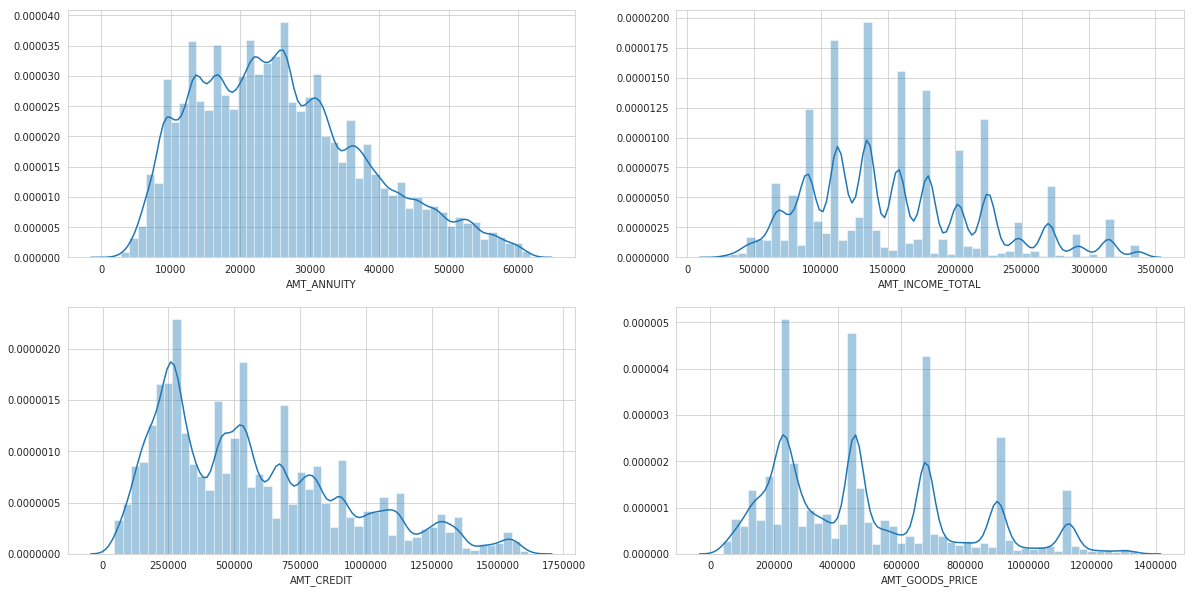

In [114]:
# So the graph looks more intuitive
fig , ax = plt.subplots(2,2, figsize=(20, 10))
plot_removing_outlier('AMT_ANNUITY', ax, 0,0)
plot_removing_outlier('AMT_INCOME_TOTAL', ax, 0,1)
plot_removing_outlier('AMT_CREDIT', ax, 1,0)
plot_removing_outlier('AMT_GOODS_PRICE', ax, 1,1)
plt.show()

**Conclusion**
Univariate analysis for few of the highly Correlated Columns with Target
1. For AMT_ANNUITY: the density of data points looks pretty scattered , the values mostly lies between 0-60000
2. For AMT_INCOME_TOTAL: the value lies between 0-350000
3. For AMT_CREDIT: the values lies between 0-1750000
4. For  AMT_GOODS_PRICE: the density of data points looks pretty scattered , and the value lies between 0-1400000.

In [0]:
#Creating a function to analyse numerical variables
def plot_continuous(var_name):
    if 'DAYS' in var_name:
        application_data[var_name] = abs(application_data[var_name])
    plt.subplots(figsize= (10,6))
    sns.kdeplot(application_data.loc[application_data['TARGET']==1, var_name], label = 'target == 1', shade=True, bw = 2)
    sns.kdeplot(application_data.loc[application_data['TARGET']==0, var_name], label = 'target == 0', shade = True, bw = 2)
    plt.xlabel(var_name, fontsize=12)
    plt.ylabel('Density', fontsize=15)
    plt.legend()
    plt.show()

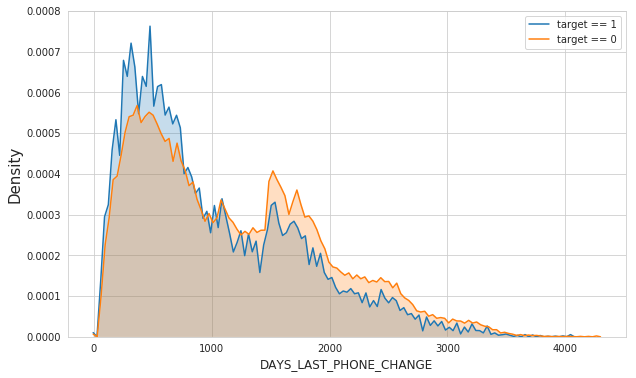

In [116]:
plot_continuous('DAYS_LAST_PHONE_CHANGE')

**Conclusion:** As we can see it clearly, if the applicant has changed the phone number 1000 days before applying for loan, is more likely to default.

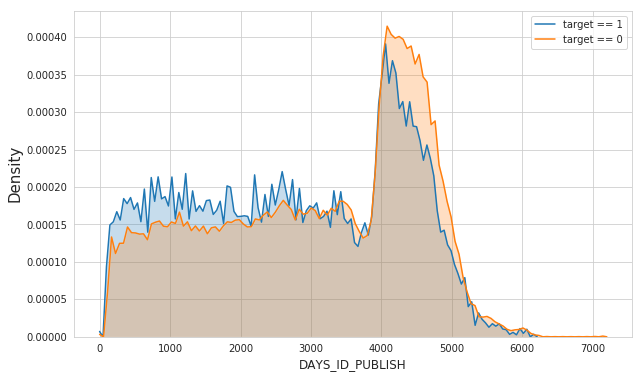

In [117]:
plot_continuous('DAYS_ID_PUBLISH')

**Conclusion:** We can see a person who applied for the loan 3000 days before changing the identity document with which he had applied for loan is more likely to default

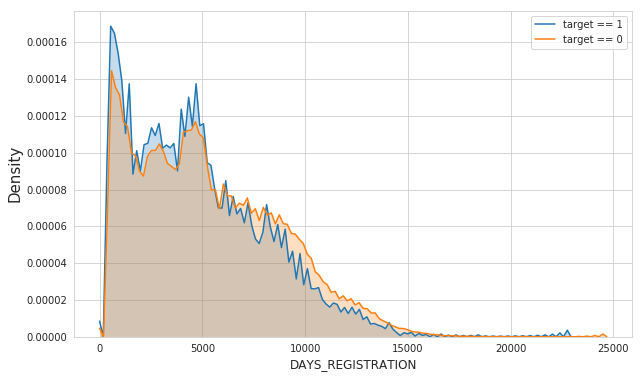

In [118]:
plot_continuous('DAYS_REGISTRATION')

**Conclusion:** The client who changed in his registration 5000 days before the application is more likely to default.

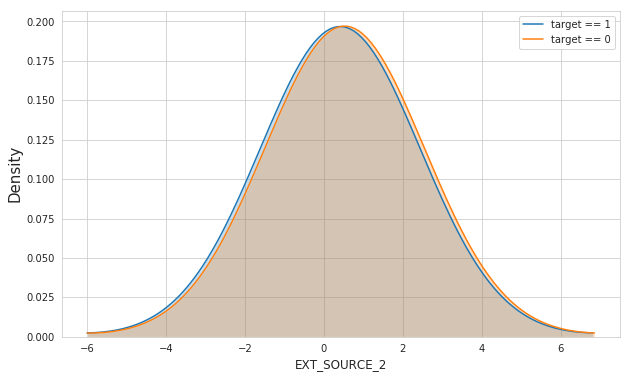

In [119]:
plot_continuous('EXT_SOURCE_2')

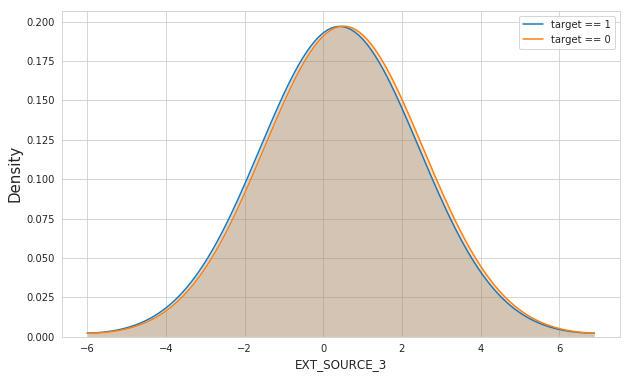

In [120]:
plot_continuous('EXT_SOURCE_3')

**Conclusion:** Both of the EXT_SOURCE are negatively correlated with the target that means, we can say as the EXT_SOURCE increases, the client is more likely to repay the loan.

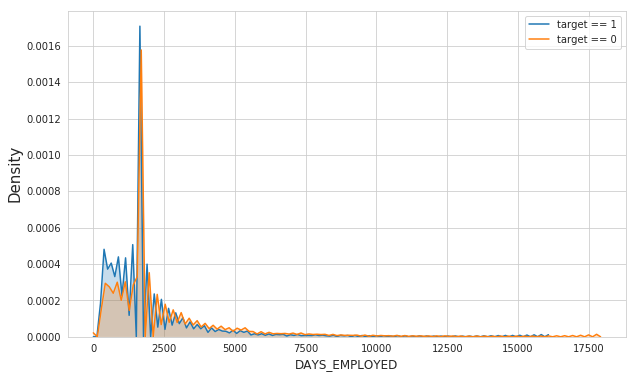

In [121]:
plot_continuous('DAYS_EMPLOYED')

**Conclusion:** As the plot shows, clients who are employed for less than 2000 days are more likely to default

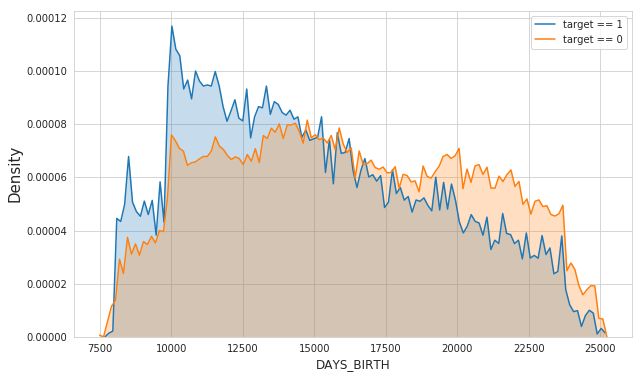

In [122]:
plot_continuous('DAYS_BIRTH')               

**Conclusion** As the plot shows, if the days of birth is less than ~14000 days prior to application, then they are most likely to default

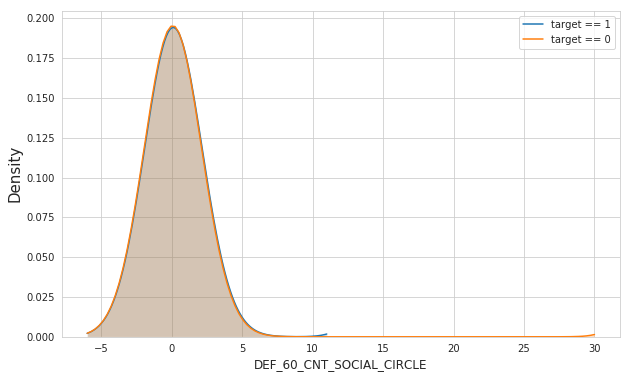

In [123]:
plot_continuous('DEF_60_CNT_SOCIAL_CIRCLE')               

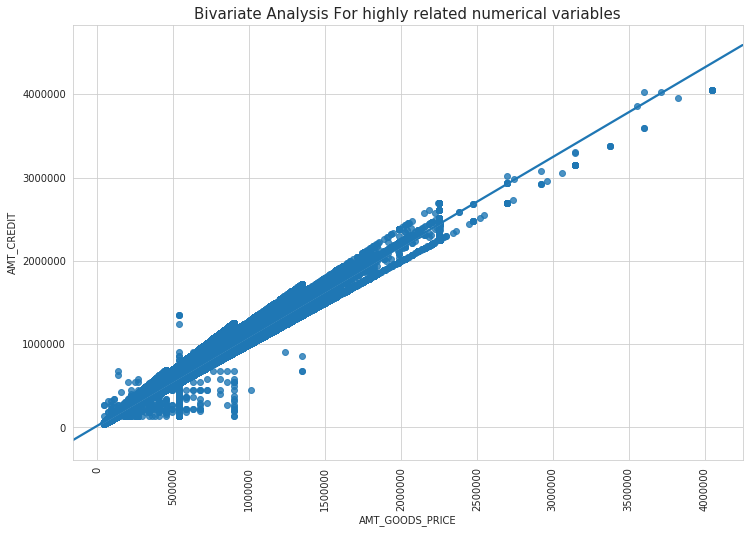

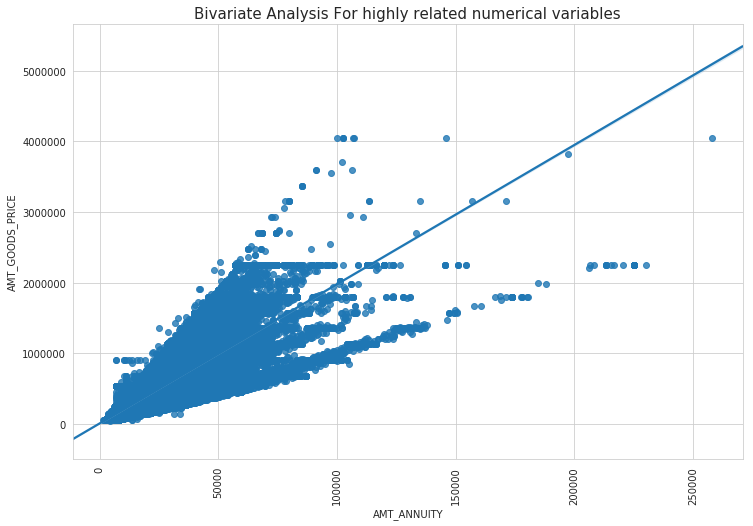

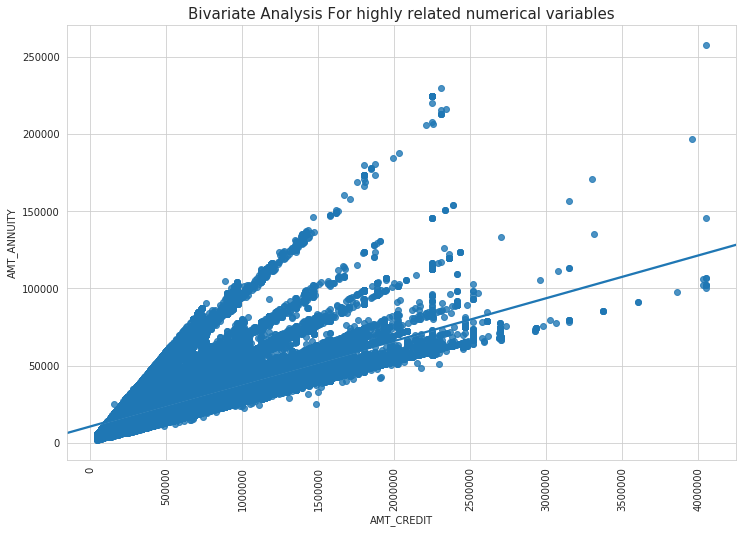

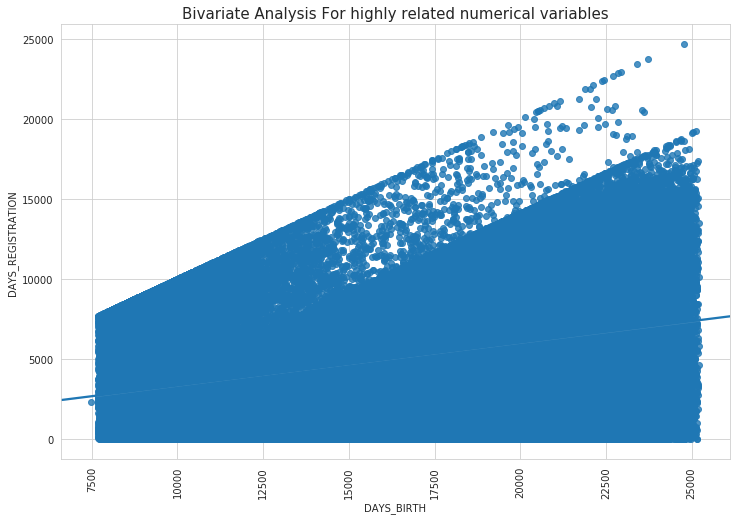

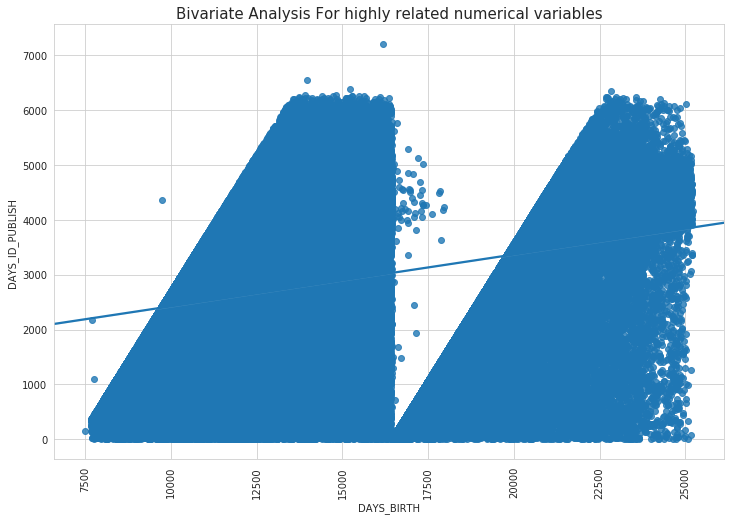

In [124]:
plt.figure(figsize=(12,8))
sns.regplot(application_data['AMT_GOODS_PRICE'],application_data['AMT_CREDIT'])
plt.xticks(rotation=90)
plt.title('Bivariate Analysis For highly related numerical variables', fontsize=15)

plt.figure(figsize=(12,8))
sns.regplot(application_data['AMT_ANNUITY'],application_data['AMT_GOODS_PRICE'])
plt.xticks(rotation=90)
plt.title('Bivariate Analysis For highly related numerical variables', fontsize=15)

plt.figure(figsize=(12,8))
sns.regplot(application_data['AMT_CREDIT'],application_data['AMT_ANNUITY'])
plt.xticks(rotation=90)
plt.title('Bivariate Analysis For highly related numerical variables', fontsize=15)

plt.figure(figsize=(12,8))
sns.regplot(application_data['DAYS_BIRTH'],application_data['DAYS_REGISTRATION'])
plt.xticks(rotation=90)
plt.title('Bivariate Analysis For highly related numerical variables', fontsize=15)

plt.figure(figsize=(12,8))
sns.regplot(application_data['DAYS_BIRTH'],application_data['DAYS_ID_PUBLISH'])
plt.xticks(rotation=90)
plt.title('Bivariate Analysis For highly related numerical variables', fontsize=15)
plt.show()


**Conclusion:** From the above five plots, we can say the top three correlated variables are directly proportional among one another. 

The plot with the variable DAYS_BIRTH | DAYS_REGISTRATION, the correlation varies from 0 to +1 for different datapoints of DAYS_BIRTH

The plot with the variable DAYS_BIRTH | DAYS_ID_PUBLISH, the correlation varies from 0 to +1 till the DAYS_BIRTH 16000, the pattern discontinues due to the fall in values in the variable DAYS_ID_PUBLISHED then continues with the same previous pattern.

####Exploratory Data Analysis for the previous application

In [125]:
#prior to any analysis we are getting all null values
prev_application_data.isnull().sum().sort_values(ascending=False)

CNT_PAYMENT                    372230
PRODUCT_COMBINATION               346
AMT_CREDIT                          1
NAME_CASH_LOAN_PURPOSE              0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                         0
AMT_APPLICATION                     0
AMT_GOODS_PRICE                     0
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CONTRACT_STATUS                0
NAME_YIELD_GROUP                    0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
SK_ID_PREV                          0
dtype: int64

In [126]:
#Checking the characteristics
prev_application_data['CNT_PAYMENT'].describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

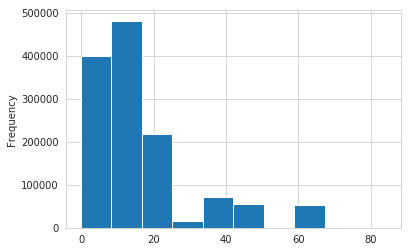

In [127]:
#Checking the distribution
prev_application_data['CNT_PAYMENT'].plot.hist()

In [0]:
#Imputing the value
prev_application_data['CNT_PAYMENT'].replace({np.nan:prev_application_data['CNT_PAYMENT'].median()},inplace=True)

In [129]:
#Checking the characteristics 
prev_application_data['PRODUCT_COMBINATION'].describe()

count     1669868
unique         17
top          Cash
freq       285990
Name: PRODUCT_COMBINATION, dtype: object

In [0]:
#Imputing the value with mode as this a categorical value
prev_application_data['PRODUCT_COMBINATION'].replace({np.nan:prev_application_data['PRODUCT_COMBINATION'].mode()[0]},inplace=True)

In [131]:
#Checking the characteristics
prev_application_data['AMT_CREDIT'].describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

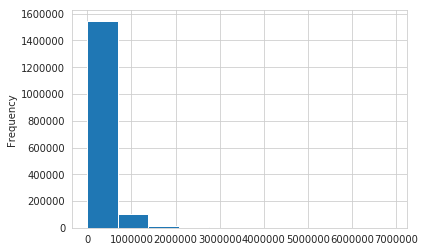

In [132]:
#Checking the characteristics
prev_application_data['AMT_CREDIT'].plot.hist()

In [0]:
#Imptuting the missing value
prev_application_data['AMT_CREDIT'].replace({np.nan:prev_application_data['AMT_CREDIT'].median()},inplace=True)

In [134]:
prev_application_data.isnull().sum().sort_values(ascending=False)

PRODUCT_COMBINATION            0
NAME_YIELD_GROUP               0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
SK_ID_PREV                     0
dtype: int64

There are no null values remaining in any variables

In [135]:
#Finding possible categorical variables among numerical variables
prev_application_data.select_dtypes(np.number).nunique()

SK_ID_PREV                 1670214
SK_ID_CURR                  338857
AMT_ANNUITY                 357960
AMT_APPLICATION              93885
AMT_CREDIT                   86803
AMT_GOODS_PRICE              93886
HOUR_APPR_PROCESS_START         24
DAYS_DECISION                 2922
SELLERPLACE_AREA              2097
CNT_PAYMENT                     49
dtype: int64

**Conclusion:** There are no possible categorical variables

In [136]:
#Listing out categorical variables
prev_application_data.select_dtypes(['object','bool','category']).nunique().sort_values()

FLAG_LAST_APPL_PER_CONTRACT     2
NFLAG_LAST_APPL_IN_DAY          2
NAME_PRODUCT_TYPE               3
NAME_CONTRACT_TYPE              4
NAME_CONTRACT_STATUS            4
NAME_PAYMENT_TYPE               4
NAME_CLIENT_TYPE                4
NAME_PORTFOLIO                  5
NAME_YIELD_GROUP                5
WEEKDAY_APPR_PROCESS_START      7
CHANNEL_TYPE                    8
CODE_REJECT_REASON              9
NAME_SELLER_INDUSTRY           11
PRODUCT_COMBINATION            17
NAME_CASH_LOAN_PURPOSE         25
NAME_GOODS_CATEGORY            28
dtype: int64

In [0]:
#PLot all the categorical variable
def plot_distribution_comp(var,nrow=2):
    
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(15,7*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        plt.subplots_adjust(hspace=0.5)
        sns.barplot(prev_application_data[feature].value_counts().index,100*(prev_application_data[feature].value_counts()/len(prev_application_data[feature])))
        locs, labels = plt.xticks()
        plt.xticks(rotation=45)
        plt.tick_params(axis='both', which='major', labelsize=8)
    plt.show();

<Figure size 432x288 with 0 Axes>

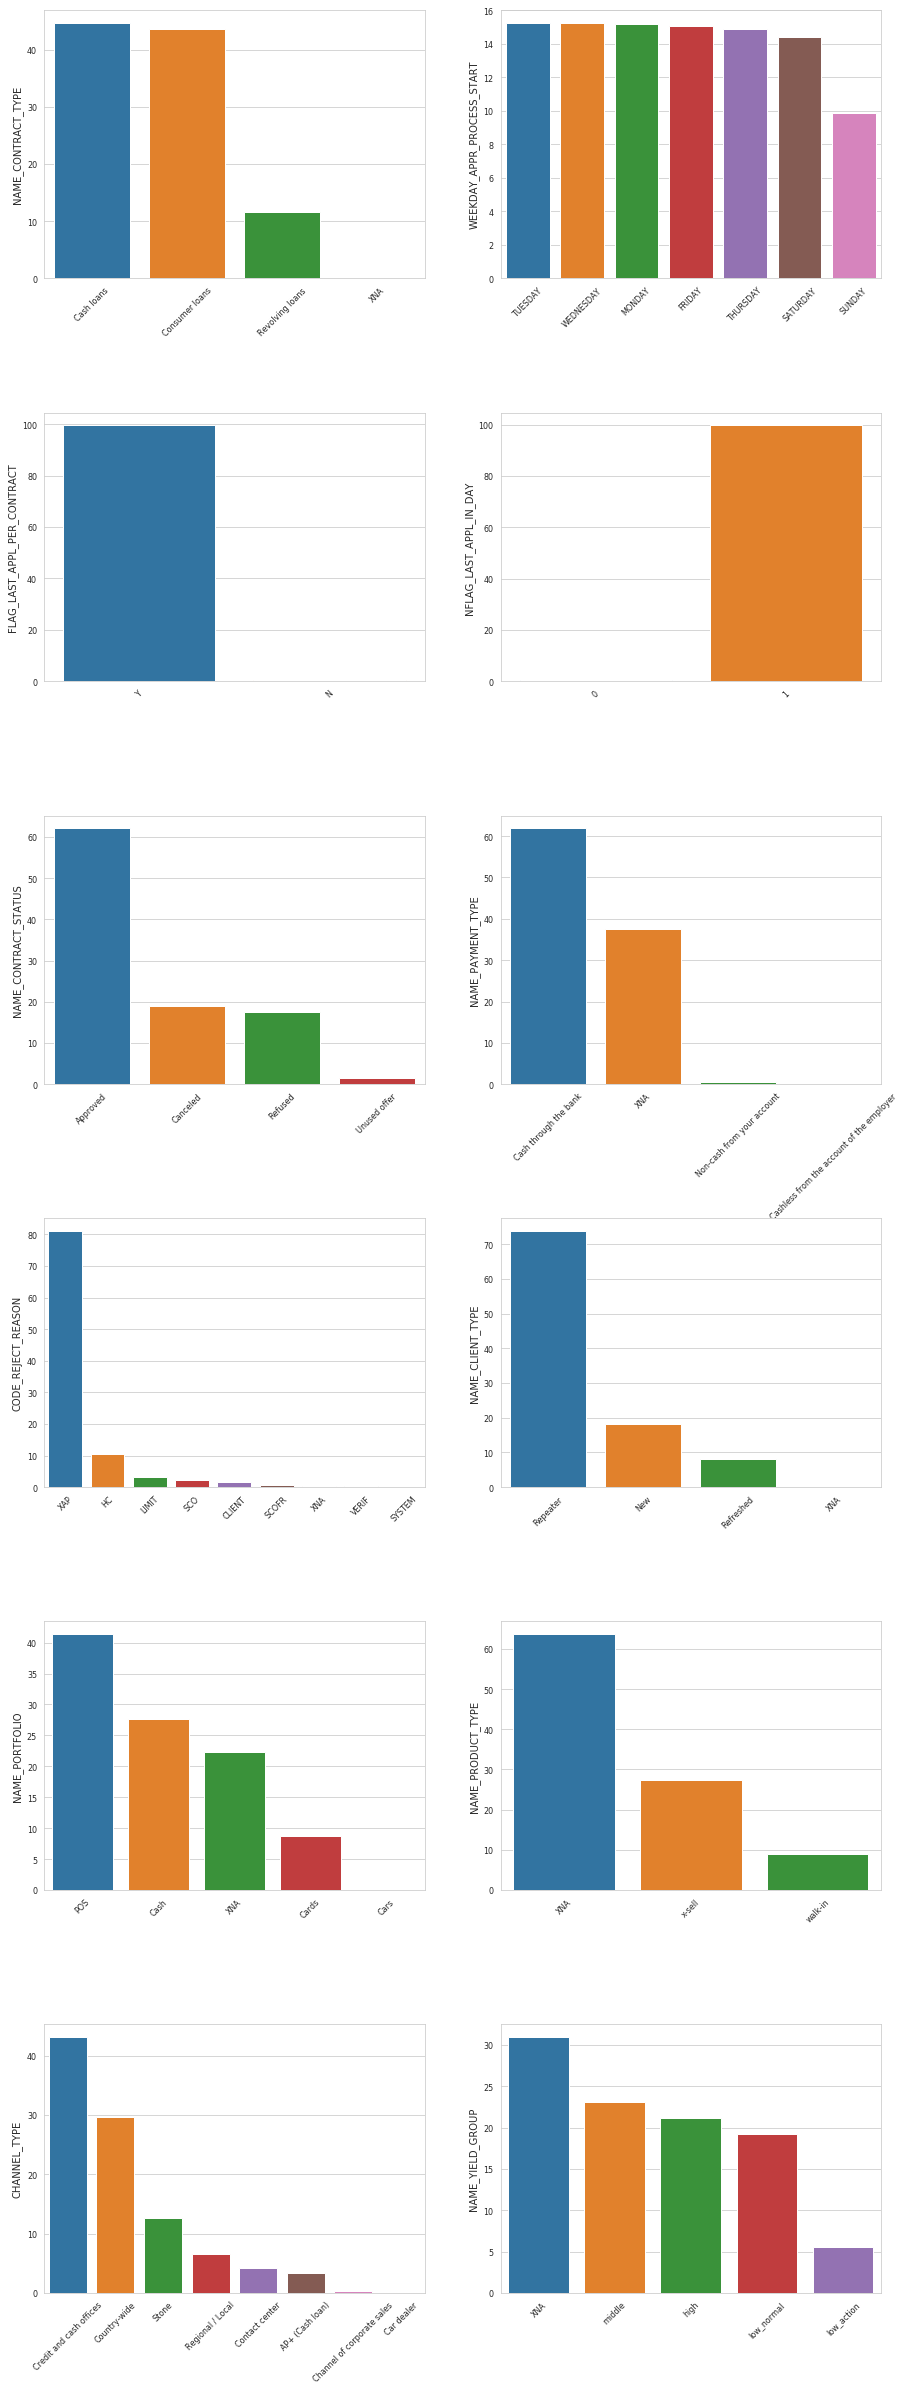

In [138]:
#Checking the distribution of the categorical variables
listtoplot = prev_application_data.select_dtypes(['object','bool','category']).nunique()
col_names=listtoplot[listtoplot.values<10].index.tolist()
plot_distribution_comp(col_names,nrow=6)

The categorical varibles for which the distribution of uniques categories have been plotted are:
1. **FLAG_LAST_APPL_PER_CONTRACT**: We have only data for last application for the previous contract (100%)
2. **NFLAG_LAST_APPL_IN_DAY**: All the datas are for the application that was the last application per day of the client. No error had been made.
3. **NAME_PRODUCT_TYPE** : 60% of the product type of clients' previous application is not available.               
4. **NAME_CONTRACT_TYPE** : The data looks balance except for the revolving loans, number of clients are less.              
5. **NAME_CONTRACT_STATUS**: 60% of the client's applications are approved where as ~20% of the applications are cancelled or Refused.            
6. **NAME_PAYMENT_TYPE**: Most of the clients chose to go for Cash payment mode and the data looks imbalance.               
7. **NAME_CLIENT_TYPE**: Existing client i.e., category 'Repeater' applied for loan the most (~75%) following with new clients with ~18%.               
8. **NAME_PORTFOLIO**: The clients with the previous application for POS have applied for loan the most i.e., ~40% following the clients with previous application for Cash with ~22% 
9. **NAME_YIELD_GROUP**: ~22% of the clien's interest rate of loan are categorised into middle following with ~20% of the clients with high interest rate in their previous application.            
10. **WEEKDAY_APPR_PROCESS_START**: We can see every day almost same percentage of applications have been registered and on Sunday just ~10% of applications are registered
11. **CHANNEL_TYPE**: Almost 40% of the clients' applications are aquired from credit and cash offices.  
12. **CODE_REJECT_REASON**: 80% of the reason for rejecting the application is XAP i.e., the reason has not been mentioned for most of the rejection. Following with HC that is the reason for rejection of 10% of the application

####Checking the correlation among different variables

In [139]:
#As we've already dealt with nan values, we can proceed direclty with finding correlation
correlation_prev = prev_application_data.corr()
correlation_prev

SK_ID_PREV  SK_ID_CURR  ...  SELLERPLACE_AREA  CNT_PAYMENT
SK_ID_PREV                 1.000000   -0.000321  ...         -0.001079     0.009506
SK_ID_CURR                -0.000321    1.000000  ...          0.001265     0.000027
AMT_ANNUITY                0.010130    0.000508  ...         -0.015021     0.391173
AMT_APPLICATION            0.003302    0.000280  ...         -0.007649     0.681114
AMT_CREDIT                 0.003659    0.000194  ...         -0.009567     0.674387
AMT_GOODS_PRICE            0.013446    0.000324  ...         -0.015836     0.650977
HOUR_APPR_PROCESS_START   -0.002652    0.002842  ...          0.015671    -0.041831
DAYS_DECISION              0.019100   -0.000637  ...         -0.018382     0.169552
SELLERPLACE_AREA          -0.001079    0.001265  ...          1.000000    -0.007734
CNT_PAYMENT                0.009506    0.000027  ...         -0.007734     1.000000

[10 rows x 10 columns]

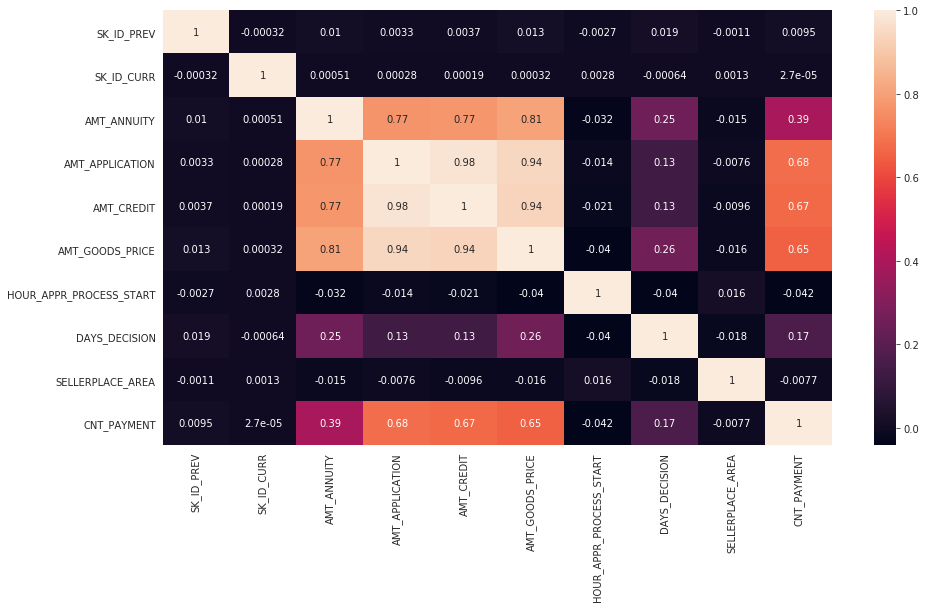

In [140]:
plt.figure(figsize=(15,8))
sns.heatmap(correlation_prev,annot=True)

In [141]:
#Finding the top 5 correlated variables
print(correlation_prev.abs().unstack().sort_values(ascending=False)[correlation_prev.abs().unstack().sort_values(ascending=False)!=1].head(10))

AMT_APPLICATION  AMT_CREDIT         0.975824
AMT_CREDIT       AMT_APPLICATION    0.975824
AMT_APPLICATION  AMT_GOODS_PRICE    0.944614
AMT_GOODS_PRICE  AMT_APPLICATION    0.944614
AMT_CREDIT       AMT_GOODS_PRICE    0.937753
AMT_GOODS_PRICE  AMT_CREDIT         0.937753
AMT_ANNUITY      AMT_GOODS_PRICE    0.808610
AMT_GOODS_PRICE  AMT_ANNUITY        0.808610
AMT_ANNUITY      AMT_CREDIT         0.773140
AMT_CREDIT       AMT_ANNUITY        0.773140
dtype: float64


The top 5 correlated variables are:

1. AMT_CREDIT      | AMT_APPLICATION    0.975824
2. AMT_GOODS_PRICE | AMT_APPLICATION    0.944614
3. AMT_GOODS_PRICE | AMT_CREDIT         0.937753
4. AMT_GOODS_PRICE | AMT_ANNUITY        0.808610
5. AMT_CREDIT      | AMT_ANNUITY        0.773140

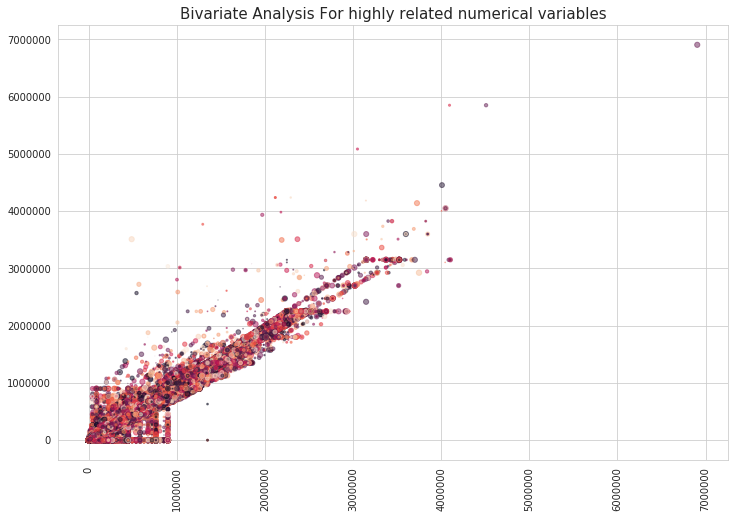

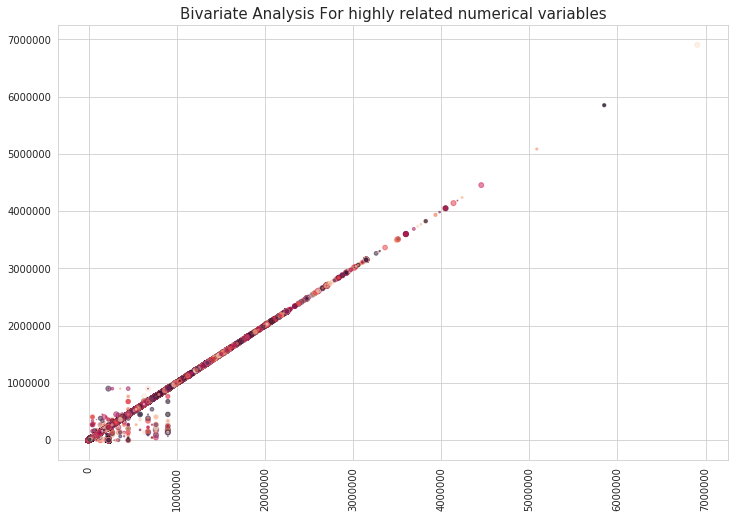

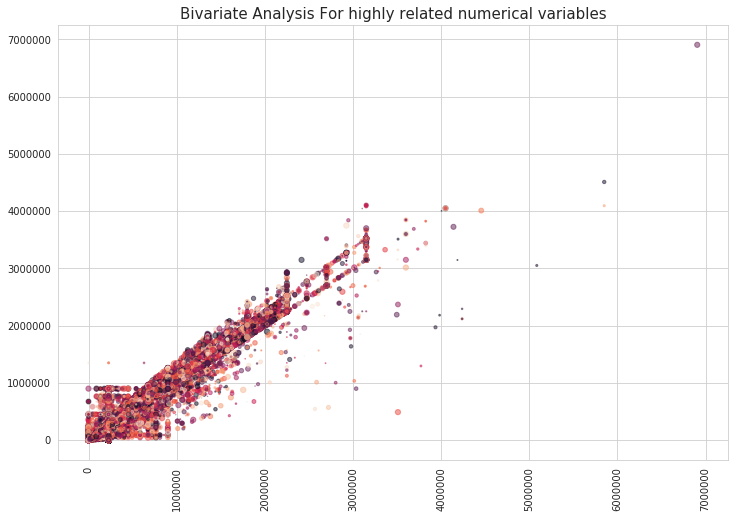

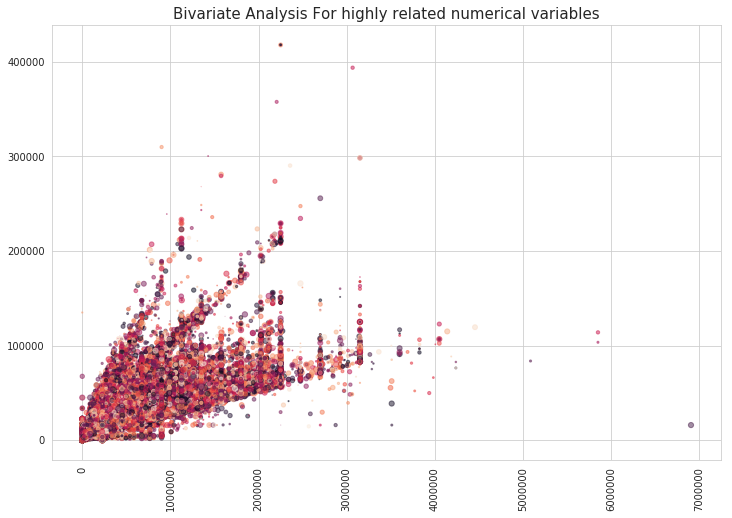

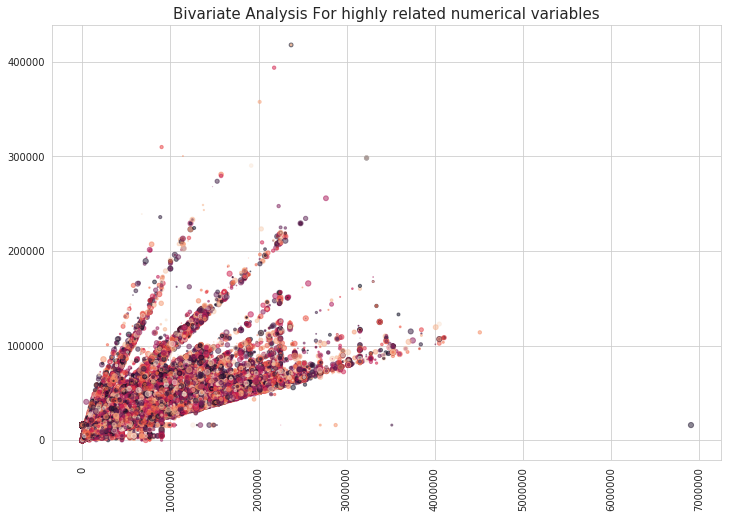

In [142]:
fig = plt.figure(figsize=(12,8))
colors = np.random.rand(len(prev_application_data['AMT_CREDIT']))
area = (30 * np.random.rand(len(prev_application_data['AMT_CREDIT']))**2)  # 0 to 15 point radii
plt.scatter(prev_application_data['AMT_CREDIT'], prev_application_data['AMT_APPLICATION'], s=area, c=colors, alpha=0.5)
plt.xticks(rotation=90)
plt.title('Bivariate Analysis For highly related numerical variables', fontsize=15)
plt.show()

plt.figure(figsize=(12,8))
colors = np.random.rand(len(prev_application_data['AMT_GOODS_PRICE']))
plt.scatter(prev_application_data['AMT_GOODS_PRICE'],prev_application_data['AMT_APPLICATION'],s=area, c=colors, alpha=0.5)
plt.xticks(rotation=90)
plt.title('Bivariate Analysis For highly related numerical variables', fontsize=15)

plt.figure(figsize=(12,8))
colors = np.random.rand(len(prev_application_data['AMT_GOODS_PRICE']))
plt.scatter(prev_application_data['AMT_GOODS_PRICE'],prev_application_data['AMT_CREDIT'],s=area, c=colors, alpha=0.5)
plt.xticks(rotation=90)
plt.title('Bivariate Analysis For highly related numerical variables', fontsize=15)

plt.figure(figsize=(12,8))
colors = np.random.rand(len(prev_application_data['AMT_GOODS_PRICE']))
plt.scatter(prev_application_data['AMT_GOODS_PRICE'],prev_application_data['AMT_ANNUITY'],s=area, c=colors, alpha=0.5)
plt.xticks(rotation=90)
plt.title('Bivariate Analysis For highly related numerical variables', fontsize=15)

plt.figure(figsize=(12,8))
colors = np.random.rand(len(prev_application_data['AMT_CREDIT']))
plt.scatter(prev_application_data['AMT_CREDIT'],prev_application_data['AMT_ANNUITY'],s=area, c=colors, alpha=0.5)
plt.xticks(rotation=90)
plt.title('Bivariate Analysis For highly related numerical variables', fontsize=15)
plt.show()

**Conclusion**
So from the above four plot, all the variable are having a positive Correlation,or directly proportional with each other. 

So **Previous Application Data**
AMT_CREDIT | AMT_APPLICATION 
AMT_GOODS_PRICE | AMT_APPLICATION
AMT_GOODS_PRICE | AMT_CREDIT 
AMT_GOODS_PRICE | AMT_ANNUITY 
AMT_CREDIT | AMT_ANNUITY 

And **for Current Application data**
AMT_GOODS_PRICE | AMT_CREDIT
AMT_ANNUITY | AMT_GOODS_PRICE
AMT_CREDIT | AMT_ANNUITY
DAYS_BIRTH | DAYS_REGISTRATION
DAYS_BIRTH | DAYS_ID_PUBLISH

So the Common correlated variables are 
1. AMT_GOODS_PRICE | AMT_CREDIT
2. AMT_ANNUITY | AMT_GOODS_PRICE
3. AMT_CREDIT | AMT_ANNUITY

#### Merging of the two Dataset
1. Converting the Prev Application in such a format that for each Current Application ID there will be only one entry
2. So as to apply groupby we need to aggregate and if we plan to apply aggregate we are converting Categorical Columns to numeric values

##### Performing Number Computations

In [0]:
#Numerical Aggregation List
numerical_agg = {
        'AMT_ANNUITY': ['min', 'max', 'mean'],
        'AMT_GOODS_PRICE': ['min', 'max', 'mean'],
        'AMT_APPLICATION': ['min', 'max', 'mean'],
        'AMT_CREDIT': ['min', 'max', 'mean'],
        'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'],
        'CNT_PAYMENT': ['sum','mean'],
        'DAYS_DECISION':['sum','mean']
    }

In [144]:
#Getting the list of the Ids which is not present in the current application
missing_ids_in_prev_app = list(set(prev_application_data['SK_ID_CURR'].unique().tolist()) - set(application_data['SK_ID_CURR'].unique().tolist()))
print("Number of Ids which are not present in Current application Data but present in Previous application data i.e.{}".format(len(missing_ids_in_prev_app)))

Number of Ids which are not present in Current application Data but present in Previous application data i.e.47800


In [145]:
#Dropping all te ids which doesn't exist in the current application
after_droppping_final_prev_data = prev_application_data.drop(prev_application_data[prev_application_data['SK_ID_CURR'].isin(missing_ids_in_prev_app)].index.tolist() )
after_droppping_final_prev_data.shape

(1413701, 26)

In [146]:
#Converting the categorical columns to dummies ( or categorical cols to numerical variable)
categoric_col = after_droppping_final_prev_data.select_dtypes(['object','bool','category']).columns.tolist()
after_droppping_final_prev_data = pd.get_dummies(after_droppping_final_prev_data, dummy_na= True, columns= categoric_col)
new_dumm_cols = [col for col in after_droppping_final_prev_data.columns if col not in prev_application_data.columns.tolist()]
new_dumm_cols

['NAME_CONTRACT_TYPE_Cash loans',
 'NAME_CONTRACT_TYPE_Consumer loans',
 'NAME_CONTRACT_TYPE_Revolving loans',
 'NAME_CONTRACT_TYPE_XNA',
 'NAME_CONTRACT_TYPE_nan',
 'WEEKDAY_APPR_PROCESS_START_FRIDAY',
 'WEEKDAY_APPR_PROCESS_START_MONDAY',
 'WEEKDAY_APPR_PROCESS_START_SATURDAY',
 'WEEKDAY_APPR_PROCESS_START_SUNDAY',
 'WEEKDAY_APPR_PROCESS_START_THURSDAY',
 'WEEKDAY_APPR_PROCESS_START_TUESDAY',
 'WEEKDAY_APPR_PROCESS_START_WEDNESDAY',
 'WEEKDAY_APPR_PROCESS_START_nan',
 'FLAG_LAST_APPL_PER_CONTRACT_N',
 'FLAG_LAST_APPL_PER_CONTRACT_Y',
 'FLAG_LAST_APPL_PER_CONTRACT_nan',
 'NFLAG_LAST_APPL_IN_DAY_0.0',
 'NFLAG_LAST_APPL_IN_DAY_1.0',
 'NFLAG_LAST_APPL_IN_DAY_nan',
 'NAME_CASH_LOAN_PURPOSE_Building a house or an annex',
 'NAME_CASH_LOAN_PURPOSE_Business development',
 'NAME_CASH_LOAN_PURPOSE_Buying a garage',
 'NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land',
 'NAME_CASH_LOAN_PURPOSE_Buying a home',
 'NAME_CASH_LOAN_PURPOSE_Buying a new car',
 'NAME_CASH_LOAN_PURPOSE_Buying a used ca

In [147]:
#Removing all the NaN and XNA Columns from the list
final_catg_list = [ col for col in new_dumm_cols if not (( 'nan' in col ) or ( 'XNA' in col ))  ]
final_catg_list

['NAME_CONTRACT_TYPE_Cash loans',
 'NAME_CONTRACT_TYPE_Consumer loans',
 'NAME_CONTRACT_TYPE_Revolving loans',
 'WEEKDAY_APPR_PROCESS_START_FRIDAY',
 'WEEKDAY_APPR_PROCESS_START_MONDAY',
 'WEEKDAY_APPR_PROCESS_START_SATURDAY',
 'WEEKDAY_APPR_PROCESS_START_SUNDAY',
 'WEEKDAY_APPR_PROCESS_START_THURSDAY',
 'WEEKDAY_APPR_PROCESS_START_TUESDAY',
 'WEEKDAY_APPR_PROCESS_START_WEDNESDAY',
 'FLAG_LAST_APPL_PER_CONTRACT_N',
 'FLAG_LAST_APPL_PER_CONTRACT_Y',
 'NFLAG_LAST_APPL_IN_DAY_0.0',
 'NFLAG_LAST_APPL_IN_DAY_1.0',
 'NAME_CASH_LOAN_PURPOSE_Building a house or an annex',
 'NAME_CASH_LOAN_PURPOSE_Business development',
 'NAME_CASH_LOAN_PURPOSE_Buying a garage',
 'NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land',
 'NAME_CASH_LOAN_PURPOSE_Buying a home',
 'NAME_CASH_LOAN_PURPOSE_Buying a new car',
 'NAME_CASH_LOAN_PURPOSE_Buying a used car',
 'NAME_CASH_LOAN_PURPOSE_Car repairs',
 'NAME_CASH_LOAN_PURPOSE_Education',
 'NAME_CASH_LOAN_PURPOSE_Everyday expenses',
 'NAME_CASH_LOAN_PURPOSE_Furnit

In [0]:
#Categorical Aggregation List
cat_agg = {}
for cat in final_catg_list:
    cat_agg[cat] = ['mean']

In [149]:
num_catg = list(numerical_agg.keys())
mandt_cols = ['SK_ID_CURR']
final_list_catg = mandt_cols +final_catg_list + num_catg
final_list_catg

['SK_ID_CURR',
 'NAME_CONTRACT_TYPE_Cash loans',
 'NAME_CONTRACT_TYPE_Consumer loans',
 'NAME_CONTRACT_TYPE_Revolving loans',
 'WEEKDAY_APPR_PROCESS_START_FRIDAY',
 'WEEKDAY_APPR_PROCESS_START_MONDAY',
 'WEEKDAY_APPR_PROCESS_START_SATURDAY',
 'WEEKDAY_APPR_PROCESS_START_SUNDAY',
 'WEEKDAY_APPR_PROCESS_START_THURSDAY',
 'WEEKDAY_APPR_PROCESS_START_TUESDAY',
 'WEEKDAY_APPR_PROCESS_START_WEDNESDAY',
 'FLAG_LAST_APPL_PER_CONTRACT_N',
 'FLAG_LAST_APPL_PER_CONTRACT_Y',
 'NFLAG_LAST_APPL_IN_DAY_0.0',
 'NFLAG_LAST_APPL_IN_DAY_1.0',
 'NAME_CASH_LOAN_PURPOSE_Building a house or an annex',
 'NAME_CASH_LOAN_PURPOSE_Business development',
 'NAME_CASH_LOAN_PURPOSE_Buying a garage',
 'NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land',
 'NAME_CASH_LOAN_PURPOSE_Buying a home',
 'NAME_CASH_LOAN_PURPOSE_Buying a new car',
 'NAME_CASH_LOAN_PURPOSE_Buying a used car',
 'NAME_CASH_LOAN_PURPOSE_Car repairs',
 'NAME_CASH_LOAN_PURPOSE_Education',
 'NAME_CASH_LOAN_PURPOSE_Everyday expenses',
 'NAME_CASH_LOAN

In [150]:
#Performing Grouping of Data
temp_data = after_droppping_final_prev_data[final_list_catg]
prev_agg = temp_data.groupby('SK_ID_CURR').agg({**numerical_agg, **cat_agg})
prev_agg.columns = pd.Index(['PREV_' + col[0] + "_" + col[1].upper() for col in prev_agg.columns.tolist()])
prev_agg = prev_agg.reset_index()
prev_agg.head()

SK_ID_CURR  ...  PREV_PRODUCT_COMBINATION_POS others without interest_MEAN
0      100002  ...                                                0.0        
1      100003  ...                                                0.0        
2      100004  ...                                                0.0        
3      100006  ...                                                0.0        
4      100007  ...                                                0.0        

[5 rows x 147 columns]

In [151]:
#Checking the Shape of the new Data set(After grouping the data) and the Current Application
print("Current Application Number of Unique Records : {0} ".format(application_data.shape[0]))
print("Previous Application Aggregated Number of Unique Records : {0} ".format(prev_agg.shape[0]))

Current Application Number of Unique Records : 307511 
Previous Application Aggregated Number of Unique Records : 291057 


**Conclusion** It seems there are some record which has no previous Application Entry it might be possible, they are fresh applicant

In [152]:
#Getting the list of the Ids which is not present in the previous application
missing_ids_in_cur_app = list(set(application_data['SK_ID_CURR'].unique().tolist()) - set(prev_agg['SK_ID_CURR'].unique().tolist()))
print("Number of Ids which are not present in Previous application Data but present in Current application data i.e.{}".format(len(missing_ids_in_cur_app)))

Number of Ids which are not present in Previous application Data but present in Current application data i.e.16454


In [153]:
after_droppping_final_cur_data = application_data.drop(application_data[application_data['SK_ID_CURR'].isin(missing_ids_in_cur_app)].index.tolist() )
after_droppping_final_cur_data.shape

(291057, 73)

Now both the data set are having same Number of rows, Few things needs to be done
1. Now we need to merge them , but prior to that let's see how many categorical columns are there in the previous application dataset

In [154]:
#Converting the categorical columns to dummies ( or categorical cols to numerical variable)
categoric_col = after_droppping_final_cur_data.select_dtypes(['object','bool','category']).columns.tolist()
after_droppping_final_cur_data = pd.get_dummies(after_droppping_final_cur_data, dummy_na= True, columns= categoric_col)
new_dumm_cols = [col for col in after_droppping_final_cur_data.columns if col not in application_data.columns.tolist()]
print("Number of new Categorical Columns: {0}".format(len(new_dumm_cols)))

Number of new Categorical Columns: 221


In [155]:
#Removing all NaN and XNA Columns
final_catg_list = [ col for col in new_dumm_cols if (( 'nan' in col ) or ( 'XNA' in col ))  ]
after_droppping_final_cur_data = after_droppping_final_cur_data.drop(final_catg_list,axis =1 )
after_droppping_final_cur_data.shape

(291057, 200)

In [156]:
#Merging of datasets
final_df = after_droppping_final_cur_data.merge(prev_agg, on='SK_ID_CURR')
final_df.head()

SK_ID_CURR  ...  PREV_PRODUCT_COMBINATION_POS others without interest_MEAN
0    100002.0  ...                                                0.0        
1    100003.0  ...                                                0.0        
2    100004.0  ...                                                0.0        
3    100006.0  ...                                                0.0        
4    100007.0  ...                                                0.0        

[5 rows x 346 columns]

In [157]:
#These are the final data type of the Columns
final_df.dtypes.value_counts()

uint8      173
float64    170
int64        3
dtype: int64

In [158]:
final_df_corr = final_df.corr()
final_df_corr.head(5)

SK_ID_CURR  ...  PREV_PRODUCT_COMBINATION_POS others without interest_MEAN
SK_ID_CURR          1.000000  ...                                          -0.001181        
TARGET             -0.002278  ...                                          -0.002154        
CNT_CHILDREN       -0.001669  ...                                          -0.006915        
AMT_INCOME_TOTAL   -0.001347  ...                                          -0.002631        
AMT_CREDIT         -0.000952  ...                                          -0.009372        

[5 rows x 346 columns]

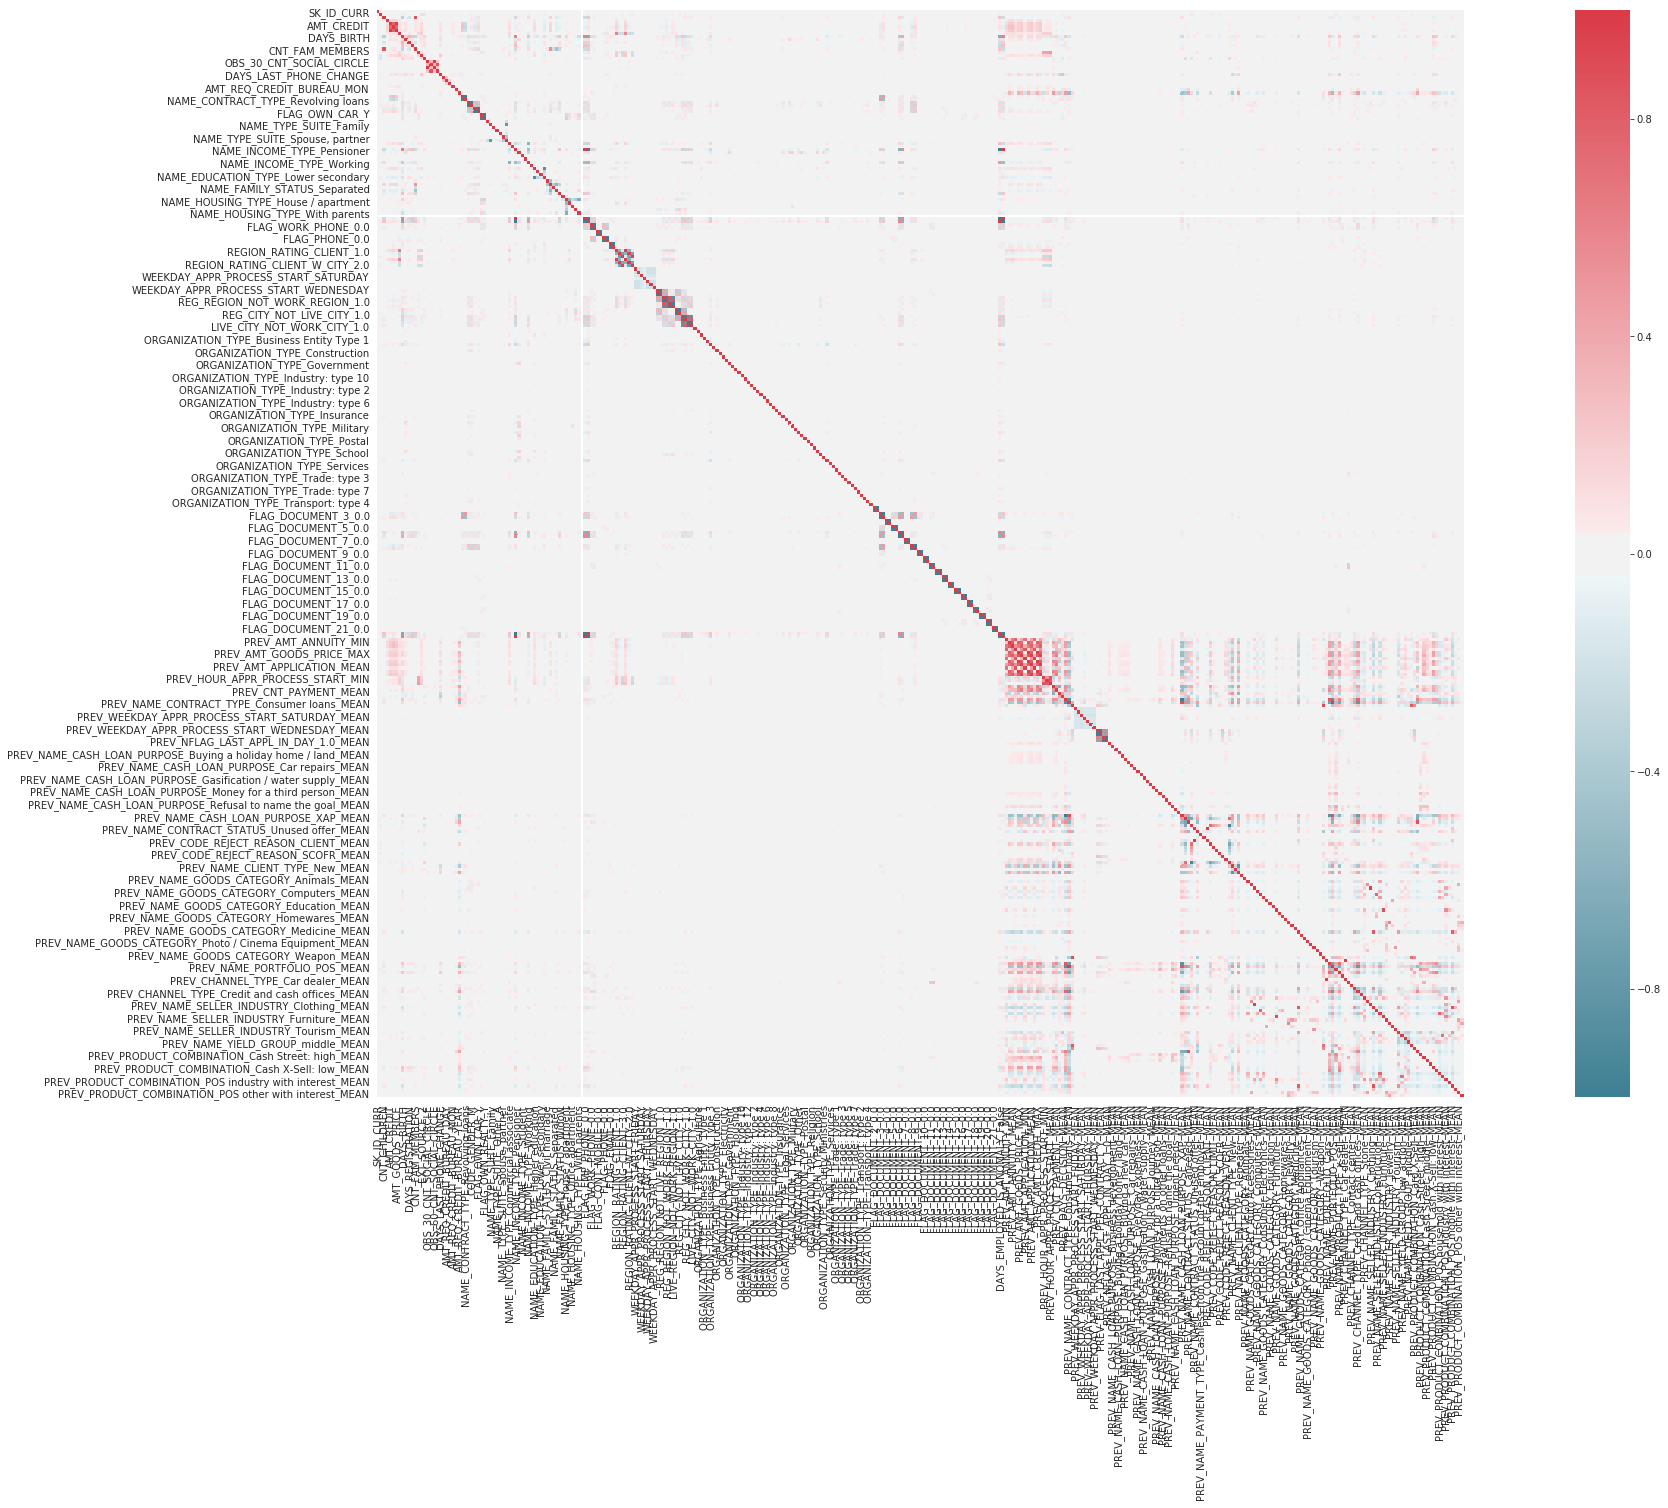

In [159]:
plt.figure(figsize=(40,20))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(final_df_corr, cmap = colormap, square=True)
plt.show()

**Conclusion** From above Heat map there were about 346 Columns and it's very difficult to draw some conclusions, who are the top contributor, but we can see there are few places in heatmap which shows some big chunk of correlations, like in the lower right side as well as top left corner. 

So as to better analyze we planned to derive top 5 strongly corrlated features that has a high contributing factor towards Target

In [160]:
#Removing the Negative Values
print("Number of Columns Found are :{}".format((final_df[col_name] < 0).any().sum()))
final_df = abs(final_df)

Number of Columns Found are :0


In [161]:
#Finding out the top 50 Correlated Columns w.r.t to target Value / who can be a possible defaulter
col_name = final_df.columns.tolist()
col_name.remove('TARGET')
col_name.remove('SK_ID_CURR')

X = final_df[col_name]
y = final_df['TARGET']

bestfeatures = SelectKBest(score_func=chi2, k= 50)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

feature_score = pd.concat([dfcolumns, dfscores], axis = 1)
feature_score.columns = ['Specs', 'Score']
print(feature_score.nlargest(50,'Score'))
col_names = feature_score.nlargest(50,'Score')['Specs'].values

                                      Specs         Score
4                           AMT_GOODS_PRICE  9.804214e+07
2                                AMT_CREDIT  5.944524e+07
204                PREV_AMT_APPLICATION_MIN  2.491951e+07
205                PREV_AMT_APPLICATION_MAX  2.198639e+07
206               PREV_AMT_APPLICATION_MEAN  2.111086e+07
207                     PREV_AMT_CREDIT_MIN  2.106181e+07
202                PREV_AMT_GOODS_PRICE_MAX  1.762741e+07
201                PREV_AMT_GOODS_PRICE_MIN  1.617650e+07
209                    PREV_AMT_CREDIT_MEAN  1.220781e+07
208                     PREV_AMT_CREDIT_MAX  1.048481e+07
203               PREV_AMT_GOODS_PRICE_MEAN  8.065116e+06
199                    PREV_AMT_ANNUITY_MAX  2.969388e+06
7                             DAYS_EMPLOYED  2.400868e+06
6                                DAYS_BIRTH  2.241635e+06
198                    PREV_AMT_ANNUITY_MIN  1.826285e+06
200                   PREV_AMT_ANNUITY_MEAN  1.493829e+06
8             

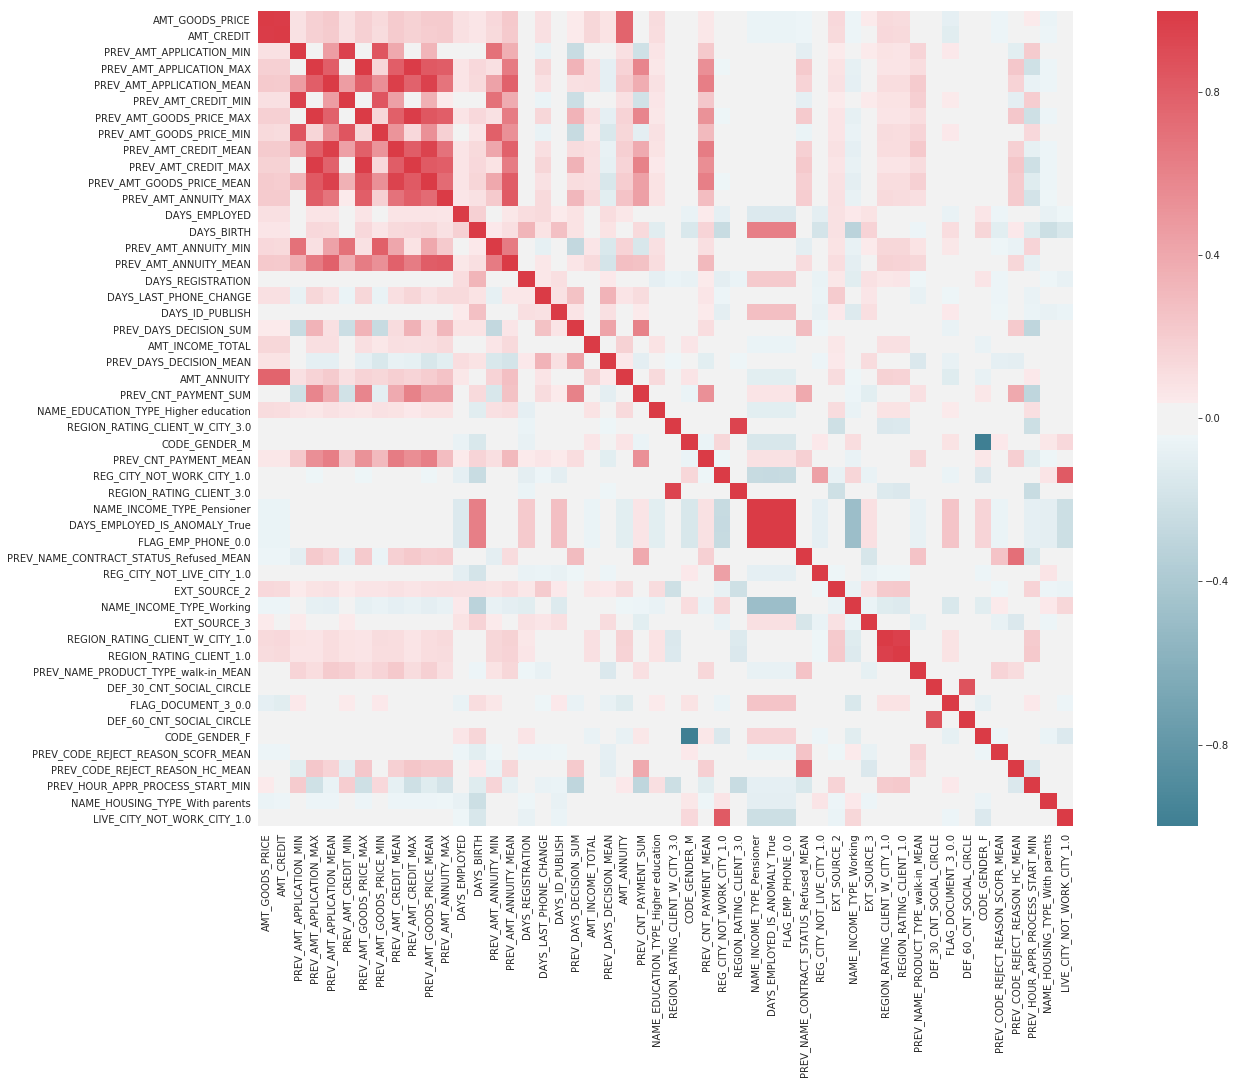

In [162]:
#PLotting the Distribution
best_50_cor_cols = final_df[col_names]
best_50_cor_cols_corr = best_50_cor_cols.corr()
plt.figure(figsize=(30,15))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(best_50_cor_cols_corr, cmap = colormap, square=True)

**Conclusion** From above plot we can find columms which are highly correlated. 

In [163]:
best_50_cor_cols.corr().unstack()[best_50_cor_cols.corr().unstack() != 1].sort_values( ascending = False).head(20)

FLAG_EMP_PHONE_0.0               DAYS_EMPLOYED_IS_ANOMALY_True      0.999884
DAYS_EMPLOYED_IS_ANOMALY_True    FLAG_EMP_PHONE_0.0                 0.999884
                                 NAME_INCOME_TYPE_Pensioner         0.999698
NAME_INCOME_TYPE_Pensioner       DAYS_EMPLOYED_IS_ANOMALY_True      0.999698
                                 FLAG_EMP_PHONE_0.0                 0.999582
FLAG_EMP_PHONE_0.0               NAME_INCOME_TYPE_Pensioner         0.999582
PREV_AMT_APPLICATION_MAX         PREV_AMT_GOODS_PRICE_MAX           0.994357
PREV_AMT_GOODS_PRICE_MAX         PREV_AMT_APPLICATION_MAX           0.994357
AMT_GOODS_PRICE                  AMT_CREDIT                         0.986229
AMT_CREDIT                       AMT_GOODS_PRICE                    0.986229
PREV_AMT_CREDIT_MAX              PREV_AMT_APPLICATION_MAX           0.985563
PREV_AMT_APPLICATION_MAX         PREV_AMT_CREDIT_MAX                0.985563
PREV_AMT_CREDIT_MAX              PREV_AMT_GOODS_PRICE_MAX           0.983324